# Logistic Regression for Heart Disease: Advanced Case Study
by [Sonjoy Das, PhD](https://www.linkedin.com/in/sonjoy-das-9b323213/)

In this work, we introduce the <b>Logistic Regression</b> algorithm, which can be used to build models that are  simple and yet effecive--in some cases. This algorithm can be used to build useful baseline models for classification problems that can be easily interpreted. For these reasons, <b>Logistic Regression</b> is considered as one of the fundamental Machine Learning (ML) algorithms associated with classification problems.

Here is a list of the main concepts covered in this notebook:

## Table of Contents
* [Classification](#Classification)
* [About the dataset](#About-the-dataset)
* [Data Science Pipeline](#Data-Science-Pipeline)
* [Libraries and custom function that will be used](#Libraries-and-custom-function-that-will-be-used)
* [Loading the Data](#Loading-the-data)
* ["Minimal EDA"](#"Minimal-EDA")
    * [Transformation of categorical features](#Transformation-of-categorical-features)
    * [Proportion of classes](#Proportion-of-classes)
    * [Digress: Balanced and Imbalanced Classes](#Digress:-Balanced-and-Imbalanced-Classes)
    * [Blood Pressure and Cholesterol Level: Let's focus on these two important features](#Blood-Pressure-and-Cholesterol-Level:-Let's-focus-on-these-two-important-features)
* [Building a Logistic Regression Model with Only Two Features](#Building-a-Logistic-Regression-Model-with-Only-Two-Features)
    * [The model building cycle](#The-model-building-cycle)
    * [Further Comments on this Result](#Further-Comments-on-this-Result)
* [Building a Logistic Regression Model with all Features](#Building-a-Logistic-Regression-Model-with-all-Features)
    * [(a) Define X and y](#(a)-Define-X-and-y)
    * [(b) Perform train/test split on $(X, y)$](#(b)-Perform-train/test-split-on-$(X,-y)$)
    * [(c) Create an object of the class associated with the algorithm to be used--in this case LogisticRegression](#(c)-Create-an-object-of-the-class-associated-with-the-algorithm-to-be-used--in-this-case-LogisticRegression)
    * [(d) Build an actual model using the fit method from the class associated with the algorithm to be used (using the training set)](#(d)-Build-an-actual-model-using-the-fit-method-from-the-class-associated-with-the-algorithm-to-be-used-(using-the-training-set))
    * [(e) Predict with the built model using the predict method from the class (training set and test set)](#(e)-Predict-with-the-built-model-using-the-predict-method-from-the-class-(training-set-and-test-set))
    * [(f) Compute performance metrics for the training and test predictions. In general, the metrics to be used and their interpretation will depend on the application at hand](#(f)-Compute-performance-metrics-for-the-training-and-test-predictions.-In-general,-the-metrics-to-be-used-and-their-interpretation-will-depend-on-the-application-at-hand)
    * [(g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning](#(g)-Determine-if-the-model-can-be-improved--repeat-as-needed-with-additional-algorithms-and/or-by-applying-hyper-parameter-tuning)
    * [Side-Bar: NEVER EVER use just Accuracy to Measure the Performance of a Classification Algorithm!](#Side-Bar:-NEVER-EVER-use-just-Accuracy-to-Measure-the-Performance-of-a-Classification-Algorithm!)
* [Logistic Regression Parameters in scikit-learn](#Logistic-Regression-Parameters-in-scikit-learn)
    * [Tuning the Model](#Tuning-the-Model)
    * [Side-Bar: Cross Validation](#Side-Bar:-Cross-Validation)
    * [Black Box Grid Search and Cross Validation in `sklearn`](#Black-Box-Grid-Search-and-Cross-Validation-in-sklearn)
* [Summary](#Summary)    
* [Optional: Appendix](#Optional:-Appendix)
    * [A Walkthrough of the Math Behind Logistic Regression](#A-Walkthrough-of-the-Math-Behind-Logistic-Regression)
    * [The Probabalistic Interpretation](#The-Probabalistic-Interpretation)
    * [Maximizing the Probability of the Training Set](#Maximizing-the-Probability-of-the-Training-Set)
    * [Discriminative vs Generative Classifiers](#Discriminative-vs-Generative-Classifiers)
* [Additional and Related Reference](#Additional-and-Related-Reference)
* [Acknowledgement](#Acknowledgement)

## Classification

Classification tries to predict which of a set of classes an observation belongs to, where classes are things like "dog or cat". Mathematically, the aim is to find a model $G(X, y)$ where $X$ is a matrix of features constructed from the data, and $y$ is a vector of class labels associated with each row (instance) in $X$, such that the model $G$ does a good job predicting classes given new data $X'$. In this work, we will consider heart patients. Thus, the classes are if a patient "has heart disease" or "does not have heart disease". We will feed the computer a set of data about prior patients along with whether they had heart disease (assessed by doctor based on some other examinations or tests), and *train* a model with the *features* (things observed about the patients, like age, weight, etc.) and the *labels* (whether the patient had heart disease). Then, given the same observations (i.e. the same features) for a *new* patient, the trained model returns the class associated with such observations, which can be used as a predictor of whether the person has heart disease or not.

The main idea of the Logistic Regression algorithm is shown schematically in the image below, for a simple case of two features (a.k.a. 2-D feature space). In its simpler form, the algorithm tries to find a line that divides "things" of two different types in this 2-D feature space. Such a line is usually called a decision boundary, but in general, the decision boundary might have a more complex form, and be in a higher dimensional space (that cannot be represented in a 2-D chart). Of course, in reality most problems (including the heart patients problems considered in this work) are more complex and are modeled with more than 2 dimensions. We will soon see this in this work.

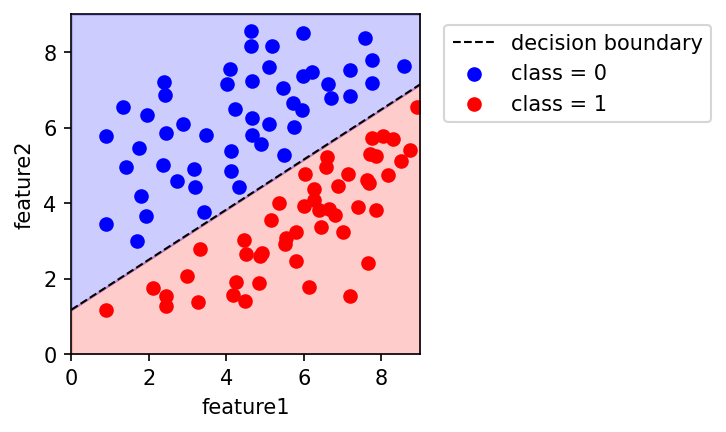

In [1]:
# This block of code is only for illustration of basic concept of logistic regression. You can ignore
# it for now. Only see resulting plot and read the textual part discussed above that refers to the plot
# below.
# Adapted from https://www.geeksforgeeks.org/understanding-logistic-regression/

# These imports will also be useful for main part of this work
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# These setting will also be useful for main part of this work
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150  


df = pd.read_csv('dataset_geeksforgeeks.csv', header = None, names = ['feature1', 'feature2', 'label'])
X, y = df[['feature1', 'feature2']], df['label']
classifier = LogisticRegression(penalty='none')
classifier.fit(X, y)

# Retrieve the model parameters.
# Source: https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
b = classifier.intercept_[0]
w1, w2 = classifier.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# print(f'Accuracy on entire data: {accuracy_score(classifier.predict(X), y):.2f}')


# Scatter plots of points with diff color for diff label
x_0 = df[df['label'] == 0][['feature1','feature2']]
x_1 = df[df['label'] == 1][['feature1','feature2']]
plt.scatter(x_0['feature1'], x_0['feature2'], c='b', label='class = 0')
plt.scatter(x_1['feature1'], x_1['feature2'], c='r', label='class = 1')

# plotting decision boundary
xmin, xmax = 0, 9
ymin, ymax = 0, 9
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--',label='decision boundary')
plt.fill_between(xd, yd, ymin, color='r', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='b', alpha=0.2)
  
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# put the legend out of the box: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

> **Note**
We will use a part of the code, that produced the above plot, later in this noteboon in Section [Blood Pressure and Cholesterol Level](#Blood-Pressure-and-Cholesterol-Level:-Let's-focus-on-these-two-important-features) to produce a similar plot as above as a part of EDA task.

## Problem Definition: Predicting Heart Disease

We'll use a dataset containing anonymous health information to build Logistic Regression models to predict the presence or absence of heart disease from facts and measurements (features) on a group of adults.

## About the dataset

In this work, the dataset on heart disease is available through the file,`heart.xlsx`, stored under 'data' subfolder. The dataset is pretty clean and nice. We verify it soon.

## Data Science Pipeline

A typical data science project is based on the following data science pipeline:
 - Step One: Problem Identification
 - Step Two: Data Wrangling
 - Step Three: Exploratory Data Analysis (EDA)
 - Step Four: Pre-processing and Training Data Development
 - Step Five: Modeling
 - Step Six: Documentation
 
In this work, we **won't complete all the steps** (in particular, 'Step Two' because our data is nice and tidy). Note separately that we already completed Step One--the problem is to use ML to help doctors assess whether a paitent has heart disease or not, using information from examinations and test. We will highly abbreviate Step Three--EDA. Step Four will be addressed as we deal with categorial variables later and split the data into training, validation, and test sets. Most of this work will focus on Step Five, Modeling. For Step Six, it is often required to prepare a separate report or some presentation materials (which will not be included here with this notebook).

## Libraries and custom function that will be used

Here, we will rely on scikit-learn to build classification models, and we need a few other modules to visualize data and manipulate the data before modeling. Let us load the required modules.

In [2]:
%matplotlib inline
#
# data manipulation and math
#
# numpy, pandas, and matplotlib.pyplot already imported earlier in code block 1
# import numpy as np
# import pandas as pd
#
# plotting and visualization
#
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
#
import seaborn as sns # For heatmap dispaly of confusion matrix
#
# modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")

Loaded Libraries


> **Note**  
It is a good practice to put all module imports in one cell near the top of the notebook, or a group of cells near the top.  This makes it easier for a team member to use the notebook later--they can see what might be needed in their Python envioronment before getting far into the notebook and having a failed import.

Let us also set some options in Jupyter and for Matplotlib, Pandas and Seaborn.

In [3]:
# The setting defined in the following three lines already done in code block 1
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150
#
cmap_list = ListedColormap(["g", "r"])

# See https://chrisalbon.com/code/python/basics/set_the_color_of_a_matplotlib/
#    and https://matplotlib.org/stable/tutorials/colors/colormaps.html
#    and https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red
cmap_segment=LinearSegmentedColormap.from_list('gr',["g", "r"], N=256) 
#

Let us display some of the colors that we defined above to see how they look like. We will be using them several of plots in this notebook.

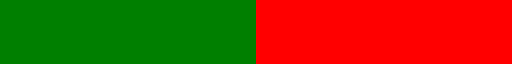

In [4]:
cmap_list

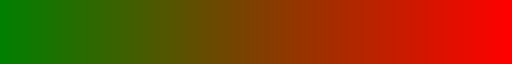

In [5]:
cmap_segment

As a final step of preparations, we provide two utility functions we will use to illustrate the concepts of classification using logistic regresssion. 

Putting this code in functions makes it efficient to re-use, as well as easier to maintain and fine-tune over time.

In [6]:
def points_plot(ax, Xtr, Xte, ytr, yte, 
                clf, 
                mesh = True,
                zfunc = False, predicted = False):
#
# note: this function only works for X.shape = (:, 2)
# it is intended to illustrate the classifier boundary
#
# get the column names if they exist to apply
# to the meshed data generated below
#
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#
#     h = 0.02
#
# create a uniform grid spanning the range of the X values
# note that y here is NOT the target, it is the 2nd
# dimension of the desired plot
#
    X = np.concatenate((Xtrain, Xtest))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
#
# predict the target value at each point in the grid
#
# this method uses the probabilities from the classifier
# and applies a function to determine the class
#
    if zfunc:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                         columns = feature_names)
        p0 = clf.predict_proba(mesh_data)[:, 0]
        p1 = clf.predict_proba(mesh_data)[:, 1]
        Z = zfunc(p0, p1)
#
# this method uses the classifier to predict the classes directly
#
    else:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                                     columns = feature_names)
        Z = clf.predict(mesh_data)
    ZZ = Z.reshape(xx.shape)
#
# plt.pcolormesh() creates a shaded result over the grid
#
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, 
                       cmap = cmap_list, 
                       alpha = 0.2, 
                       axes = ax, 
                       shading = 'auto')
#
# add the points to the plot
# these can be the original target values
# or the predicted values
#
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
#
# plot training points
#
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], 
               c = showtr, 
               cmap = cmap_list, 
               s = 20, 
               alpha = 0.8, 
               edgecolor = "k")
#    
# plot testing points
#
    ax.scatter(Xtest[:, 0], Xtest[:, 1],
               c = showte, 
               cmap = cmap_list, 
               s = 20,
               alpha = 0.8, 
               marker = "s",
              edgecolor = "k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#
    return ax, xx, yy

In [7]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, 
                     clf):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#    
    ax, xx, yy = points_plot(ax, Xtr, Xte, ytr, yte,
                         clf,
                         mesh = False,
                         predicted = True) 
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if feature_names is not None:
        mesh_data = pd.DataFrame(mesh_data, 
                     columns = feature_names)    
    Z = clf.predict_proba(mesh_data)[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = cmap_segment, alpha = 0.2)
    cs2 = plt.contour(xx, yy, Z, cmap = cmap_segment, alpha = 1)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 12)
#
    plt.show()

## Loading the data

As a first step, we will read in the data and display the numbers of rows and columns along with the names of each column (attributes). To display only the names of each columns, we will use python's (not pandas') `.join()` [method](https://docs.python.org/3/library/stdtypes.html?highlight=join#str.join).

In [8]:
heart_df = pd.read_excel("./data/heart.xlsx")
#
print('The data have ', heart_df.shape[0], ' rows and ', heart_df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(heart_df.columns)))

The data have  270  rows and  14  columns

column names: 

age_yr
sex_M_F
chest_pain_value
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
ECG_value
max_HR
exercise_angina
ST_depresssion_exercise
ST_slope_peak
number_vessels_involved
defect_diag
heart_disease


Next, let us display the top of the DataFrame using head().

## "Minimal EDA"

Earlier we reviewed the data science pipeline and noted we would not fully complete all steps here because the data is already cleaned up. In other work, significantly more time would normally be spent on Data Wrangling and Exploratory Data Analysis (EDA). For this work with clean data, let us look at the first few rows of the data, plot the variables to get a feel for the data, then apply some necessary transformations followed by inspecting the distribution of the two result classes (heart disease present or not present).

In [9]:
heart_df.head()

,age_yr,sex_M_F,chest_pain_value,resting_BP_mm_Hg,cholesterol_mg_dl,fasting_blood_sugar_high,ECG_value,max_HR,exercise_angina,ST_depresssion_exercise,ST_slope_peak,number_vessels_involved,defect_diag,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


As mentioned at the introduction, the data indeed looks quite nice and clean. And, we can be sure of it by investigating a little further. For instance, use the `.info()` method on the dataset to print a concise summary of the `heart_df` DataFrame. For syntax, refer [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [10]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_yr                    270 non-null    int64  
 1   sex_M_F                   270 non-null    int64  
 2   chest_pain_value          270 non-null    int64  
 3   resting_BP_mm_Hg          270 non-null    int64  
 4   cholesterol_mg_dl         270 non-null    int64  
 5   fasting_blood_sugar_high  270 non-null    int64  
 6   ECG_value                 270 non-null    int64  
 7   max_HR                    270 non-null    int64  
 8   exercise_angina           270 non-null    int64  
 9   ST_depresssion_exercise   270 non-null    float64
 10  ST_slope_peak             270 non-null    int64  
 11  number_vessels_involved   270 non-null    int64  
 12  defect_diag               270 non-null    int64  
 13  heart_disease             270 non-null    int64  
dtypes: float64

Note that there are no missing values. We can check it more clearly by using `DataFrame.isnull().sum()` method. The `DataFrame.isnull()` detects any missing values. See details [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html).

In [11]:
heart_df.isnull().sum()

age_yr                      0
sex_M_F                     0
chest_pain_value            0
resting_BP_mm_Hg            0
cholesterol_mg_dl           0
fasting_blood_sugar_high    0
ECG_value                   0
max_HR                      0
exercise_angina             0
ST_depresssion_exercise     0
ST_slope_peak               0
number_vessels_involved     0
defect_diag                 0
heart_disease               0
dtype: int64

So, we confirmed that there are **no missing value** in this dataset. Let's now move forward by plotting histograms of all the variables to get a feel for the data.

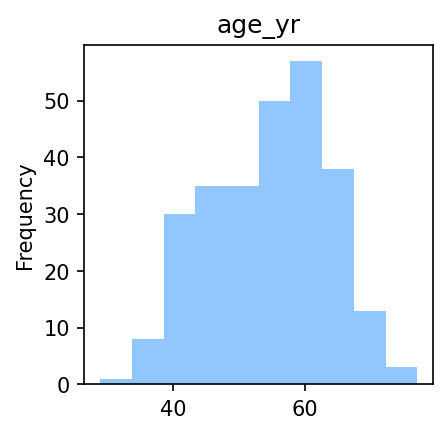

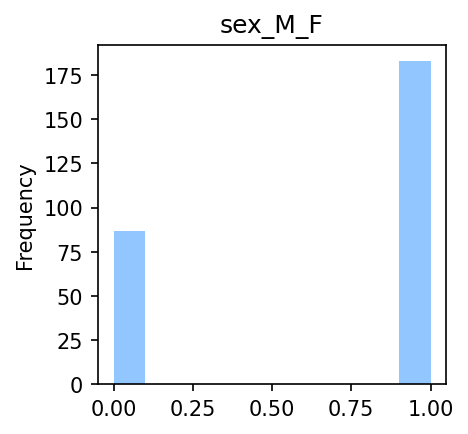

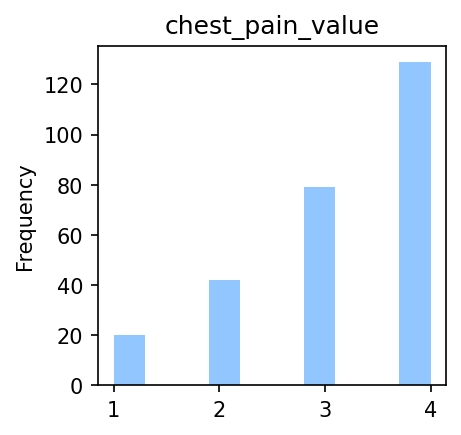

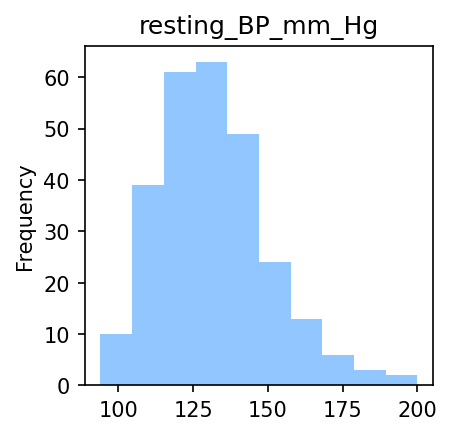

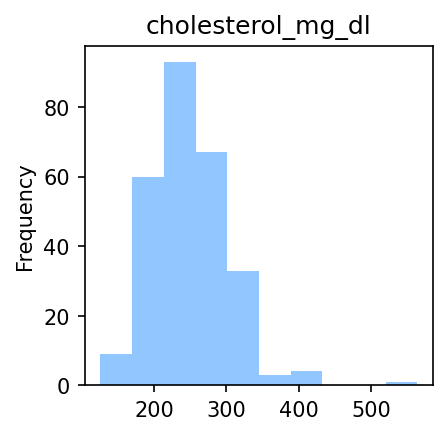

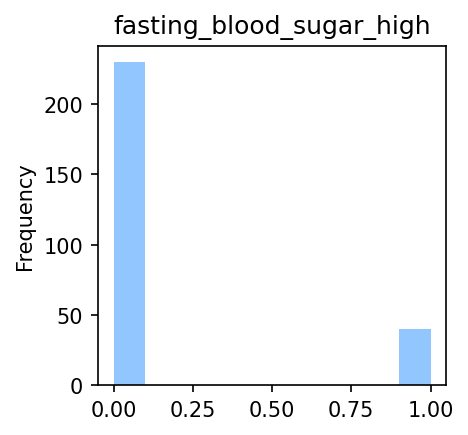

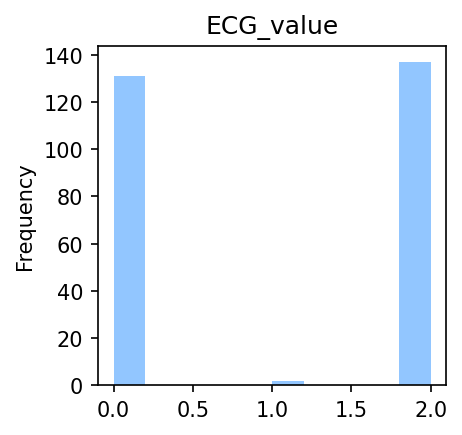

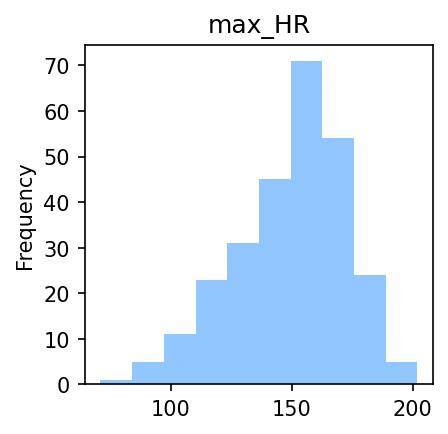

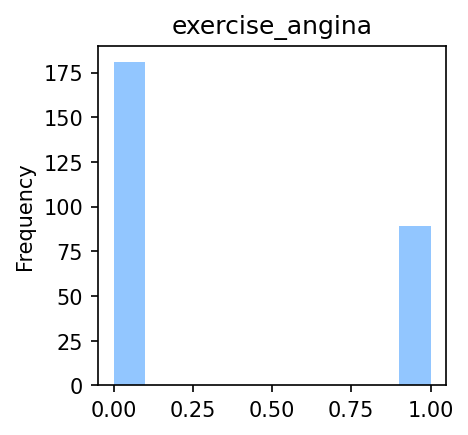

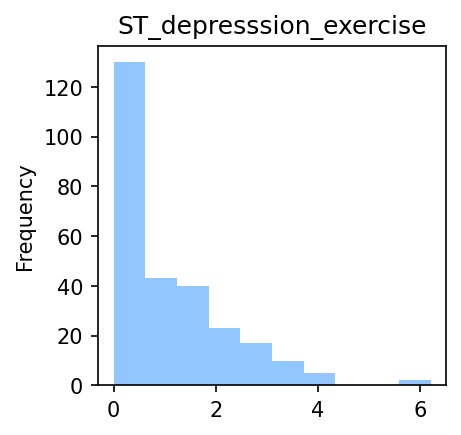

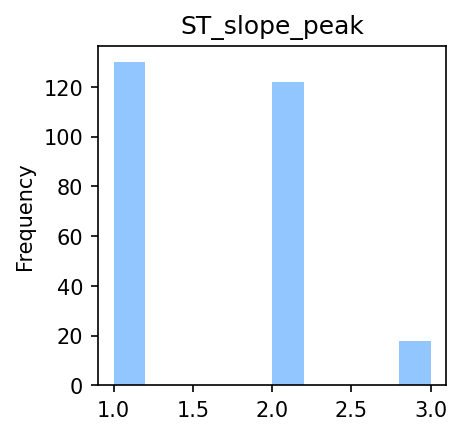

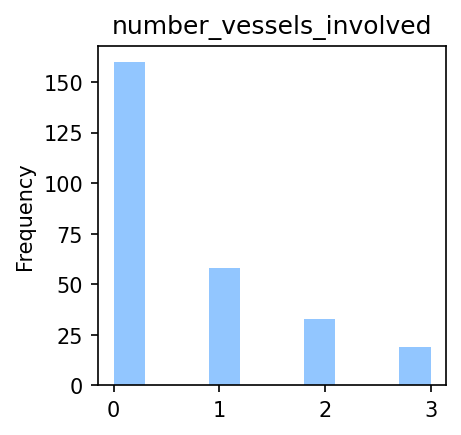

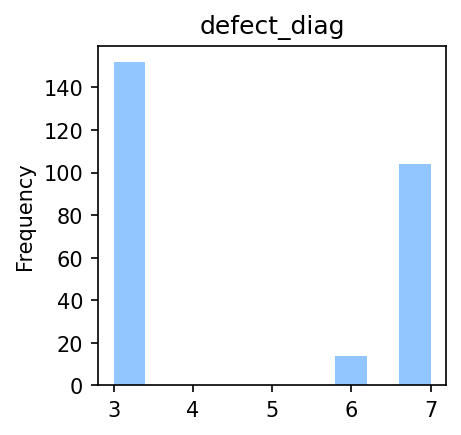

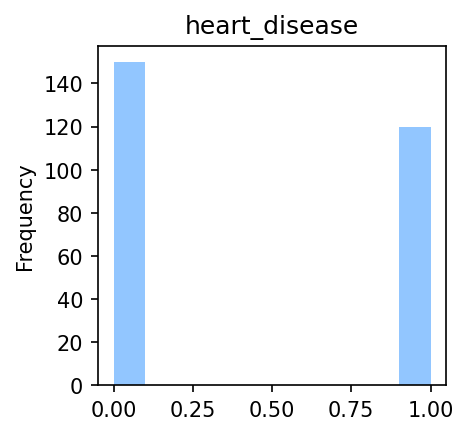

In [12]:
for col in list(heart_df.columns):
    heart_df[col].plot(kind = 'hist', title = col)
    plt.show()

Without completing a full EDA, we can see that some variables take on values that denote classes or categories (such as `sex_M_F`, `fasting_blood_sugar_high`), and thus are categorical, and some take on values that are a measure (such as `age_yr`, `resting_BP_mm_Hg`, `cholesterol_mg_dl`) and therefore are non-categorical.  Depending upon the models we choose to apply to these data, some additional preparation might be in order, such as ensuring the non-categorical values are all in sensible ranges (such as, what is a feasbile maximum value for cholesterol? we will look into it briefly for some of the features), possibly scaling some of the variables, and generally ensuring that the data is suitable for a given model, to mention only a few.  In this work, we will need to transform the categorical values to use them in a logistic regression model, which we will discuss shortly.

Before moving on to modeling, let's look at some of the features of the dataset.

> **Note**  
Moving forward, we might use the terms "variable" and "feature" interchageably, to represent the concept of the independent or `X` data. In general, there might be nuanced differences in these concepts, such as variable referring to the orignal data and feature referring to a transformed version of it.

In [13]:
#
# extract the cholesterol as a Series, and inspect the values
#
x = heart_df['cholesterol_mg_dl']
print('first 6 lines of cholesterol data:\n', x.head(6))
print('\nsummary statistics of cholesterol:\n', x.describe())

first 6 lines of cholesterol data:
 0    322
1    564
2    261
3    263
4    269
5    177
Name: cholesterol_mg_dl, dtype: int64

summary statistics of cholesterol:
 count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: cholesterol_mg_dl, dtype: float64


In [14]:
#
# extract the age as a Series, and inspect the values
#
x = heart_df['age_yr']
print('first 6 lines of age data:\n', x.head(6))
print('\nsummary statistics of age:\n', x.describe())

first 6 lines of age data:
 0    70
1    67
2    57
3    64
4    74
5    65
Name: age_yr, dtype: int64

summary statistics of age:
 count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age_yr, dtype: float64


In [15]:
#
# do the same for the resting blood pressure
#
y = heart_df['resting_BP_mm_Hg']
print('first 6 lines of blood pressure data:\n', y.head(6))
print('\nsummary statistics of blood pressure:\n', y.describe())

first 6 lines of blood pressure data:
 0    130
1    115
2    124
3    128
4    120
5    120
Name: resting_BP_mm_Hg, dtype: int64

summary statistics of blood pressure:
 count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_BP_mm_Hg, dtype: float64


The features explored above look reasonable for a mixture of patients who might have or might not have heart disease.

### Transformation of categorical features

In general, categorical features need to be transformed or *encoded* to be used in some machine learning models, as is the case for Logistic Regression. A common transformation is so-called *dummy encoding*, where each possible value of a feature becomes a new column, and a 1 is placed in that column if the data instance (a row of the data) contained that value, and a 0 is placed in that column otherwise.  

For example, suppose we had a column in a hypothetical data set called species, and it contained one of two values, "cat" or "dog". The column might look like this:
```
species
cat
cat
dog
dog
cat
dog
...
```

Dummy encoding would replace this with two columns:
```
species_cat   species_dog
    1              0
    1              0
    0              1
    0              1
    1              0
    0              1
   ...            ...
```
This method extends to multiclass features. Here we use the Pandas method `get_dummies()` [function](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to transform a subset of columns that we *consider* for the current work as categorical type. Note how we can specify which columns we want to be transformed, so we make a list of them first. If the columns are not specified, Pandas will decide which columns are categorical based on the Pandas type, and convert those. This can be convenient but is not always what is desired. For clarity, we explicitly define them here.

In [16]:
categorical_features = ['sex_M_F',
                        'chest_pain_value',
                        'ECG_value',
                        'ST_slope_peak',
                        'defect_diag']
heart_df_dummies = pd.get_dummies(heart_df, columns = categorical_features)
print('The data have ', heart_df_dummies.shape[0], ' rows and ', heart_df_dummies.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(heart_df_dummies.columns)))

The data have  270  rows and  24  columns

column names: 

age_yr
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
max_HR
exercise_angina
ST_depresssion_exercise
number_vessels_involved
heart_disease
sex_M_F_0
sex_M_F_1
chest_pain_value_1
chest_pain_value_2
chest_pain_value_3
chest_pain_value_4
ECG_value_0
ECG_value_1
ECG_value_2
ST_slope_peak_1
ST_slope_peak_2
ST_slope_peak_3
defect_diag_3
defect_diag_6
defect_diag_7


### Proportion of classes
When building classification models, it is always a good idea to know right away the number of samples per class, proportionally to the total number of samples. First, let us get the counts of each class.

In [17]:
class_counts = heart_df_dummies['heart_disease'].value_counts()
class_counts

0    150
1    120
Name: heart_disease, dtype: int64

Notice that `class_counts` is a Pandas Series object:

In [18]:
type(class_counts)

pandas.core.series.Series

We can easily compute the relative frequencies (percentages) to better quantify differences in the incidences of the classes:

In [19]:
class_percentages = pd.Series([(x / heart_df_dummies.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    55.555556
1    44.444444
dtype: float64

Now we can use the percentages as labels and plot the distribution of the two classes:

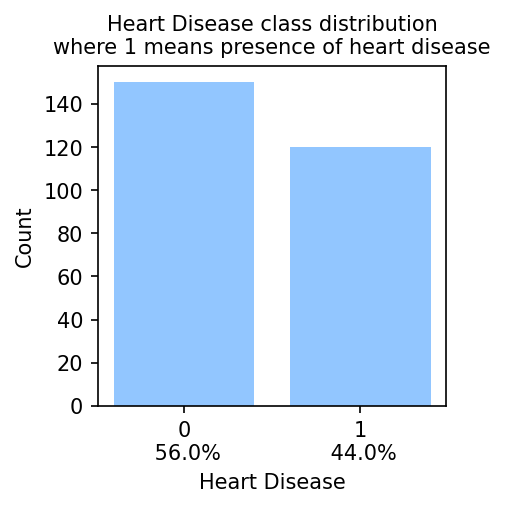

In [20]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease',
              fontsize = 10)
plt.show()

The code above can be readily generalized to handle multiple classes.

### Digress: Balanced and Imbalanced Classes
For a binary classification problem (two classes), the problem is called *balanced* if the number of elements of each class is about the same--in other words, each class would have a size that is about 50% of the total number of elements in the dataset. In the current heart patients dataset, one would say that this problem is slightly imbalanced, since the difference in the percentages is about 10%. When there is a imbalance among the classes in a binary classification problem, one usually refers to them as the *minority class*, and the *majority class*.

In practice, *Imbalanced Classification Problems* (ICP) are very common in situations where one is modeling events that are not common, and thus these events would be instances of the *minority* class. Examples of these problems include: study of diseases such as Cancer, study of processes such as fraud, and--in general--the study of rare anomalies within a system. It is common to find instances of these problems where the difference in the percentages is 80% or more.

There are two important challenges posed by ICPs:

- The difference in the size of the classes is *inherent* to the problem under study. This means that one cannot pave this difference by adding more elements to the minority class.

- Classification algorithms are usually negatively affected by the lack of sufficient samples of the minority class, in that the models built with them are practically unable to differentiate the minority class from the majority class, where the former is the one of interest. For instance, imagine a model built to compute the likelihod of a patient developing Cancer that nearly always predicts a small likelihood for this class (meaning, that the model predicts NO Cancer, when it should have predicted Cancer in some cases).

Since this particular work deals with a slight imbalance among the classes, we might be able to build useful models with the given dataset--without introducing additional interventions. One general approach to deal with ICP is by either generating sythetic data (a.k.a. *oversampling*), or by generating a set of smaller "majority classes" by taking chunks from the original majority class (a.k.a. *undersampling*). In general, these approaches are collectively referred to as *resampling*.
We did not need to implement these schemes in the present work.

The concepts discussed above can be readily generalized to ICPs with a number of classes greater than 2 (*Imbalanced Multi-Class Classification Problems*--IMCP).

### Blood Pressure and Cholesterol Level: Let's focus on these two important features

In the next section, we will start building up a simple Logistic Regression model. The model will be built using only two features. A complete model using all the features will be considered in the following section. For the simple two-features model, what variables can we consider? It's a common knowledge these days that two of the important factors that are directly related to heart disease are "cholesterol" and "blood pressure". See this [article](https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118). It states the following under the section titled "Risk factors":

+ **High blood pressure.** Uncontrolled high blood pressure can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows.

+ **High blood cholesterol levels.** High levels of cholesterol in your blood can increase the risk of plaque formation and atherosclerosis.

Let us then explore these two variables a bit more. For this, we will carry out the following two simple subtasks:

<div class="span5 alert alert-info">
<h3>Task Set I</h3>

<ul>
  <li> <b>Task Ia:</b> Create a scatter plot of Blood Pressure vs. Cholesterol Level
  <li> <b>Task Ib:</b> Color the points differently by the Presence of Heart Disease
</ul>
</div>

We have included a plot at the very beginnin of this notebook in Section [Classification](#Classification) illustrating how the decision boundary in logistic regression model separates two sets of points belonging to two different classes. We will adapt a part of that code block to complete the above Task I.

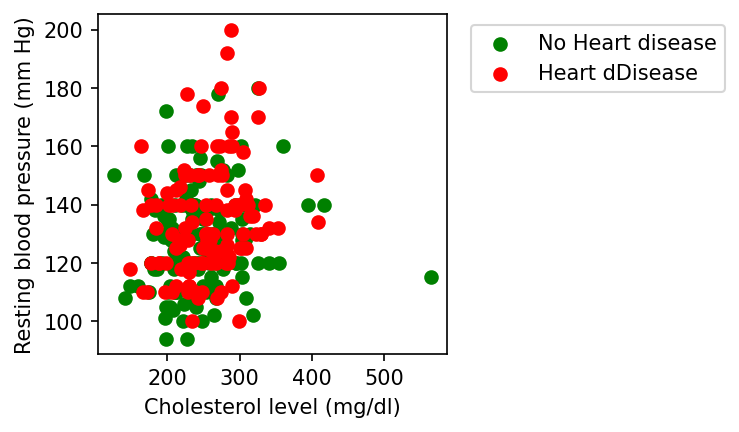

In [21]:
# Scatter plots of points (Cholesterol, Blood Pressure) labeled with different colors by 
# the presence or absence of heart disease

df = heart_df_dummies[['cholesterol_mg_dl','resting_BP_mm_Hg','heart_disease']]
df.columns = ['feature1','feature2', 'label']

x_0 = df[df['label'] == 0][['feature1','feature2']]
x_1 = df[df['label'] == 1][['feature1','feature2']]
plt.scatter(x_0['feature1'], x_0['feature2'], c='g', label='No Heart disease')
plt.scatter(x_1['feature1'], x_1['feature2'], c='r', label='Heart dDisease')
  
plt.xlabel('Cholesterol level (mg/dl)')
plt.ylabel('Resting blood pressure (mm Hg)')

# put the legend out of the box: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In this 2D feature space defined by `cholesterol_mg_dl` and `resting_BP_mm_Hg`, the points associated with "heart disease" (red points) and "no heart disease" (green points) are not separable by a decision boundary line. This means that other features are significant to classify a patient as having heart disease or not.

In the following section, we will explore this fact by building a logistic regression model by only considering the two features (`cholesterol_mg_dl` and `resting_BP_mm_Hg`) and will verify that the model will indeed *not* be a good one!

## Building a Logistic Regression Model with Only Two Features

As explained above, we want to demonstrate in this section a simple case of logistic regression model where `X` contains only two features, and therefore we can plot the classification results on an x-y plot. The utility function, `points_plot()`, that we provided earlier in Section [Libraries and custom function](#Libraries-and-custom-function-that-will-be-used), will color the classifier results for the two target classes, on a plot of the two `X` features.

Recall our features are:
```
age_yr
resting_BP_mm_Hg
cholesterol_mg_dl
fasting_blood_sugar_high
max_HR
exercise_angina
ST_depresssion_exercise
number_vessels_involved
heart_disease
sex_M_F_0
sex_M_F_1
chest_pain_value_1
chest_pain_value_2
chest_pain_value_3
chest_pain_value_4
ECG_value_0
ECG_value_1
ECG_value_2
ST_slope_peak_1
ST_slope_peak_2
ST_slope_peak_3
defect_diag_3
defect_diag_6
defect_diag_7
```
...of which we are choosing, as mentioned in the previous section, "cholesterol" (i.e., `cholesterol_mg_dl`) and "blood pressure" (i.e., `resting_BP_mm_Hg`).

### The model building cycle
 
Now we apply the steps required for ML model building:

> (a) train/test split using `sklearn`'s `train_test_split()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  
> (b) create an object of the class associated with the algorithm to be
 used--in this case `sklearn`'s `LogisticRegression()` [class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
> (c) build an actual model using the `fit()` method from the class (applied to the training set)  
> (d) for the test set, predict with the built model using the `predict()` method from the class  
> (e) compute performance metrics (in this case, accuracy) for the training and test sets  

Next, consider

> (a) how the parameters passed to `train_test_split()` are computed "on-the-fly", what their types are expected to be, and what are the values of the parameters that are not passed explicitly, which will take the default values per the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) of `train_test_split()` ...  

> The documentation of `train_test_split()` can also be accessed, if you run ``help(train_test_split)`` in a notebook cell after the module has been imported.

In [22]:
# help(train_test_split)

> **Note**: When subsetting our data into dependent and independent variables, it is essential to use double brackets for `X` and single bracket for `y` as shown below. This allows us to have shapes of `X` and `y`, respectively, of the form `(R,n_features)` and `(R,)`, where `R` is the number of rows of `X` or `y`. This is important when fitting the logistic regression model using `.fit()` method which expects `ytrain` to be a 1d array **not** a column-vector (or 2D array).

In [23]:
X, y = heart_df_dummies[['cholesterol_mg_dl','resting_BP_mm_Hg']], heart_df_dummies['heart_disease']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                train_size = 0.80,
                                                random_state = 42)

In [24]:
# Check the shape of the X train, y_train, X_test and y_test 
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(216, 2) (216,)
(54, 2) (54,)


> (b) create an object of the class associated with the algorithm to be used--in this case LogisticRegression. Please take a note of the arguments that we are explicitly passing and also the other parameters that are not being passed. These other parameters will therefore take their default valuess per the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of the constructor of class `LogisticRegression()`. Please review them carefully. In a later Section on [Tuning the Model](#Tuning-the-Model), we will discuss them in further details.

In [25]:
classifier = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty='none')

> (c) Fit the training set to the model using the `.fit()` method.

In [26]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(max_iter=500, penalty='none', solver='newton-cg')

> (e.1) compute performance metrics (in this case, accuracy) for the training set. Notice how `accuracy_score()` receives the result from `classifier.predict(Xtrain)`, and compares it with `ytrain` to produce the training accuracy 

> the documentation can be viewed at: [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or you can run ``help(accuracy_score)`` in a notebook cell after the module has been imported

In [27]:
print(f'Accuracy on training data: {accuracy_score(ytrain, classifier.predict(Xtrain)):.2f}')

Accuracy on training data: 0.61


Note the order in which the parameters should be passed according to the documentation of `accuracy_score()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), although in this case there is no difference since it is a one-to-one comparison.

Re-compute with switched order to confirm what we expect.

In [28]:
print(f'Accuracy score: (classifier.predict(Xtrain), ytrain) [**note reversed order]: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy score: (classifier.predict(Xtrain), ytrain) [**note reversed order]: 0.61


> (e.2) compute similarly now the accuracy for the test predictions

In [29]:
print(f'Accuracy on test data: {accuracy_score(ytest, classifier.predict(Xtest)):.2f}')

Accuracy on test data: 0.59


We can now see graphically how the model is differentiating elements of both classes after being built with only two features (Cholesterol Level, and Resting Blood Pressure)

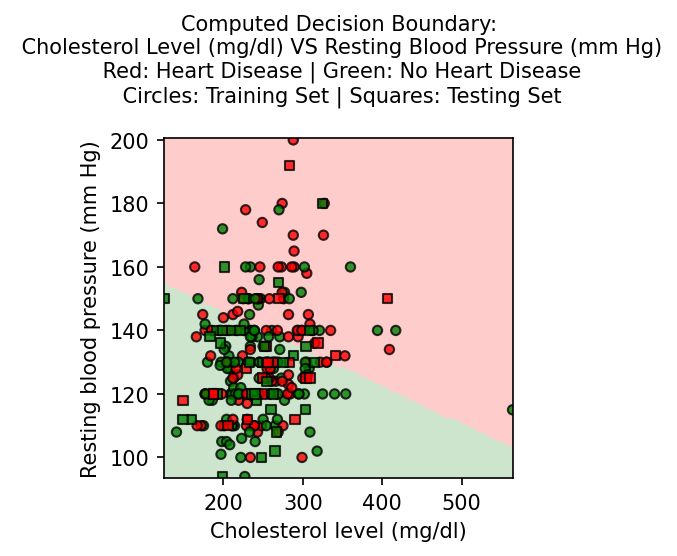

In [30]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
ax.set_title('Computed Decision Boundary:\n ' +
             'Cholesterol Level (mg/dl) VS Resting Blood Pressure (mm Hg)' +
             '\n Red: Heart Disease | Green: No Heart Disease' +
             '\n Circles: Training Set | Squares: Testing Set\n',
            fontsize = 10)
_ = points_plot(ax, Xtrain, Xtest, ytrain, ytest, classifier)

As we can see, many red circles (training set) and squares (test set), that represent heart disease, are in the green region of no heart disease. The classifier is not doing well, which is expected as we commented earlier at the end of the previous section. Let us now focus on quantifying the performance using some metrics using sklearn's `classification_report()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [31]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.61      0.78      0.68       117
           1       0.61      0.40      0.48        99

    accuracy                           0.61       216
   macro avg       0.61      0.59      0.58       216
weighted avg       0.61      0.61      0.59       216



Let us next compute and display the confusion matrix using sklearn's `confusion_matrix()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Later in this notebook, we will also discuss confusion matrix in a [Section](#Side-Bar:-NEVER-EVER-use-just-Accuracy-to-Measure-the-Performance-of-a-Classification-Algorithm!) on why accuracy score should *not just be the only measure* of performance of a classification algorithm. In the following code block, rather than displaying directly the values of different elements of the confusion matrix (output of `confusion_matrix()`), we will display the *percentage* associated with these different values. This will be useful to readily verify the accuracy score that we obtained earlier. We will first compute the confusion matrix and then use `seaborn`'s (imported as `sns`) `heatmap()` function (ref: [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)) to display the percentage-valued confusion matrix. Shwoing the percentage values will help us to readily verify the accuracy score that we computed earlier.

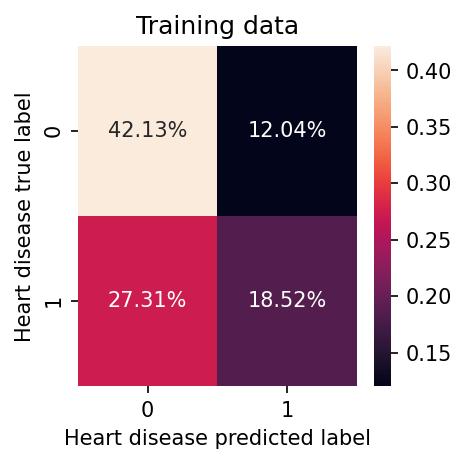

In [32]:
ax = plt.gca()

c_mat = confusion_matrix(ytrain, classifier.predict(Xtrain))
# Source: https://medium.com/@datasciencewizards/getting-started-with-machine-learning-algorithms-logistic-regression-5467d1b879c
sns.heatmap(c_mat/np.sum(c_mat), annot=True, fmt='.2%', ax=ax)
# ConfusionMatrixDisplay.from_predictions(ytrain,classifier.predict(Xtrain),ax=ax)
ax.xaxis.set_label_text('Heart disease predicted label')
ax.yaxis.set_label_text('Heart disease true label')
ax.set_title('Training data');

We can see that approximately 61% (42.13 + 18.52)% values are accurately predicted for the training data, while 39% (27.31 + 12.04)% values are not correctly predicted. Recall that our accuracy was 61% obaine earlier using `accuracy_score()` and using `classification_report()`.

Not only accuracy, we can also compute precision, recall, f1-score, etc., that we see in thhe output of `classification_report()`, from the confusion matrix. For formulae of these measures, you may refer to a standard textbook on ML or some online resources, such as, this [article](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd), or this [one](https://faun.pub/ml-metrics-accuracy-vs-precision-vs-recall-vs-f1-score-111caaeef180) or directly the sklearn's [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html). For instance, we can compute **precision** for label 1 (heart disease) as follows:

\begin{equation}
    \mathrm{precision}_1 = \frac{TP_1}{TP_1 + FP_1} = \frac{18.52}{18.52+12.04} = 0.61
\end{equation}

**Precision** is intuitively the ability of the classifier not to label a negative sample as positive. In other words, out of all positive predictions by the classifier, what percentage of them are actually, truly positive? That is, it measures how precise the classifier is.

Similarly, we can compute **recall** for class or label 1 using the numbers in the confusion matrix as follows:

\begin{equation}
\mathrm{recall}_1 = \frac{TP_1}{TP_1 + FN_1} = \frac{18.52}{18.52+27.31} = 0.40
\end{equation}

**Recall** is intuitively the ability of the classifier to find all the positive samples. We can restate it as follows. Out of all of the actual positive classes in the dataset, how many of them is the classifier able to "remember" or "recall" as positive classess? In some applications, precision can be more important. For instance, false-negatives are less of a concern for YouTube or Facebook recommendations. So, precision is a better measure than recall. In medical diagnosis (such as the one we are dealing with here or for cancer patients), false-negatives can have serious consequences. So, recall is a better measure than precision. The recall value of 0.4 for label 1 (heart disease) implies that the logistic regression model based on just two features (`cholesterol_mg_dl` and `resting_BP_mm_Hg`) is not at all a good model. Again, no surprise since we already expected it from our scatter plot in [Task Set I](#Task-Set-I) at the end of the previous section.

Let's now focus on **f1-score**. When "recall" and "precision" are both equally important, then "f1-score" is a better measure to considser. It can be calculated by taking the *harmonic mean* of precision and recall. The harmonic mean is given by the *reciprocal of the arithmetic mean (i.e., the regular mean) of the reciprocals*. Thus, **f1-score** for label 1 can be computed as:

\begin{equation}
    \mbox{f1-score}_1 = \left(\frac{\mathrm{precision}_1^{-1} + \mathrm{recall}_1^{-1}}{2}\right)^{-1} = \frac{2\times\mathrm{precision}_1 \times \mathrm{recall}_1}{\mathrm{precision}_1 + \mathrm{recall}_1} = \frac{2\times0.61\times0.40}{0.61+0.4} = 0.48
\end{equation}

The f1-score reaches its best value at 1 and its worst score at 0. See sklearn's [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics) for further details. Since recall and precision are both positive numbers, f1-score will be between precision and recall. This can be readily proved by considering the formula of f1-score given above. In fact, f1-score, which is a harmonic mean, is dominated by the minimum of precision and recall (see Wikipedia [article](https://en.wikipedia.org/wiki/Harmonic_mean) for details). This implies that the f1-score tends strongly toward the least of precision and recall. It tends to mitigate the impact of maximum of precision and recall, while aggravate the impact of the minimum of precision and recall. If either precision or recall is low, the value of f1-score suffers significantly. For example, let’s say we are comparing performance of two classifiers. The first classifier's precision and recall are, respectively, 0.9 and 0.9, while the second one's precision and recall are, respectively, 1.0 and 0.7. Calculating the f1-score for these two classifiers, respectively, gives us 0.9 and 0.82. The low recall score of the second classifier reduced its f1-score down. For **imbalance dataset**, it is better to choose f1-score as a measure of performance since a high f1-score implies a good and *balanced* values of precision and recall. To get a high f1-score, both false positives and false negatives must be low. The low f1-score of 0.48 calculated above for the logistic regression model with two features again implies that the model is actually a bad one. By the way, note that f1-score (0.48) is between recall (0.4) and precision (0.61) but it tends more to the minimum of these two metrics, which, in the current case, is recall.

Next, note that **support** as reported in the output of `classification_report()` is the number of occurrences of each class in `y_true`. See sklearn's [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) for details. Since there are 216 records in the training dataset, the "support" for label 1 is 216*(27.31+18.52)/100 = 99 as we obtained from `classification_report()` output.

Finally, note that **macro avg** and **weighted avg** as reported in `classification_report()` are, respectively, the unweighted or regular average (which does not acount for label imbalance) and the average weighted by support (the number of true instances for each label). Thus, the "macro avg" of recall is simply (0.78+0.4)/2 = 0.59, while the "weighted avg" of recall is $0.78\frac{117}{117+99} + 0.4\frac{99}{117+99} = 0.61$.

In [33]:
## This simple block of code numerically illustrates that harmonic mean of two numbers lies between 
## the two numbers and satys more closely to the least of these two numbers.
# x1 = np.linspace(0.090909,0.111111,num=100)
# x2 = 0.1
# H = 2*x1*x2/(x1+x2)
# plt.plot(x1,H)
# plt.axhline(y=x2, color='r', linestyle='-');

# df=pd.DataFrame({
#      'x1': x1.ravel(),
#     'H': H.ravel()
# })
# df.loc[40:50]

Next, let us present the results of `classification_report()` and `confusion_matrix()` for the test dataset.

In [34]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.63      0.82      0.71        33
           1       0.45      0.24      0.31        21

    accuracy                           0.59        54
   macro avg       0.54      0.53      0.51        54
weighted avg       0.56      0.59      0.56        54



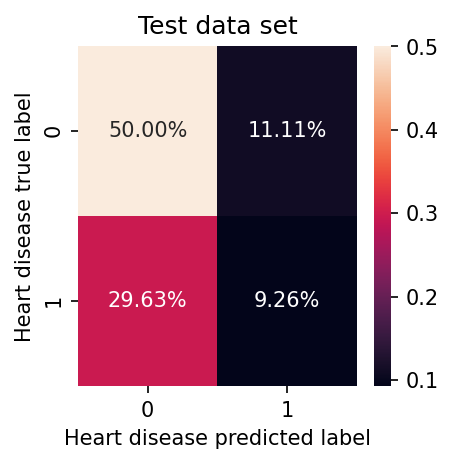

In [35]:
ax = plt.gca()

c_mat = confusion_matrix(ytest, classifier.predict(Xtest))
sns.heatmap(c_mat/np.sum(c_mat), annot=True, fmt='.2%', ax=ax)
# ConfusionMatrixDisplay.from_predictions(ytest,classifier.predict(Xtest),ax=ax)
ax.xaxis.set_label_text('Heart disease predicted label')
ax.yaxis.set_label_text('Heart disease true label')
ax.set_title('Test data set');

As we can see from both the output of `classification_report()` and `confusion_matrix()`, the classifier performance on the test dataset is really poor. Note, for instance, recall = 0.24, and f1-score = 0.34 for class 1 (heart disease)!

### Further Comments on this Result

In the scatter plot of the previous [Section](#The-model-building-cycle), class 0 (no heart disease) is shaded green, and class 1 (heart disease) is shaded red.  The train labels are plotted as circles, using the same color scheme, while the test data are plotted as squares.  Some points that are evident for this simple classifier (even though not useful):

- The classifier tends to suggest heart disease as either blood pressure or choleterol increase.  This seems intuitively correct.
- The classifier is simply not good! The accuracy on the training data is only 61%, and the accuracy on the testing data is barely better than random chance (59%)--where random chance if 50%.  As commeneted earlier, this was expected since we are using only two features implying that the other discarded features were also significant.
- As discussed, the classification report and confusion matrix show that the model performs poorly when trying to recognize inputs that belong to class 1 (*the class of interest*), which is indicated by the poor values of precision, recall, and f1-score for class 1--for the training set and test set.
- The "decision boundary" as shown in the scatter plot is a line. As we add more features, we won't be able to represent the boundary this way. The boundary becomes what is called a hyperplane, which is the generalization of a line into 3 or more dimensions. But here, a patient measured with a combination of cholesterol and blood pressure to the right/top side of the line (in the red region) would be classified as likely having heart disease.

We now move on to investigate how to get a better classifier that is optimized on the data and will perform well in the future.

## Building a Logistic Regression Model with all Features

After having seen the results of a model built with only two features, we are now going to turn our attention to building a full-fledged model using all the features, and will compare this model with the previous one, with respect to several performance metrics. 


<b>We will follow the same pattern we used before</b>. 

    
Thus, pattern defined above can be expanded as follows:

> (a) Define ``X`` and ``y``  

> (b) Perform train/test split on ``(X, y)``  

> (c) Create an object of the class associated with the algorithm to be used--in this case ``LogisticRegression``  

> (d) Build an actual model using the``fit`` method of the algorithm, i.e., ``LogisticRegression``(using the training set)  

> (e) Predict with the built model using the``predict`` method of the ``LogisticRegression`` class using both the training set and test set  

> (f) Compute relevant performance metrics for the training and test predictions. The metrics to be used and their interpretation will depend on the application at hand  

> (g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning  

> (h) Compare and Combine all best models as needed

### (a) Define ``X`` and ``y``  

The variable, `X`, contains the independent variables--a.k.a. features, but not the target. Here, `X` is usually referred to as the "Design Matrix" or "Feature Matrix", which we will represent here as a pandas' DataFrame.

The following is a very convenient way to express this using Pandas' `.drop()` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) that as implemented below means "remove the column `heart_disease` ..." from the DataFrame `heart_df_dummies`.

In [36]:
X = heart_df_dummies.drop(columns = ['heart_disease'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (270, 23)


Notice that ``X`` is a ``pandas`` DataFrame with 270 rows and 23 columns (a.k.a. a matrix).

In the next code block, we assign the target variable or vector (also known as the response, dependent, or labels) to `y`. In this case, it is the presence or absence of heart disease.

In [37]:
y = heart_df_dummies['heart_disease']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (270,)


The target vector, `y`, also has 270 records corresponding to the 270 rows of `X`.

Remember that the form of entire data we will use always is [Source: [link](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Features-and-Labels-Grid)]

<img src="images/data.png" alt="data form" style="width: 600px;"/>

In the current work, `y`, by construction, will have value 1 (i.e., True) in positions where the value for the `heart_disease` column of the dataframe `heart_df_dummies` is 1, otherwise it will be 0 (i.e., False).

So the "response" `y` is a plain array of 0s and 1s for binary classification. 

`y = [1,1,0,0,0,1,0,1,0....]`.

We can quickly check its unique values as below by using `panda`s `.unique()` function [ref: [pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)]:

In [38]:
y.unique()

array([1, 0])

This shows that the number of unique values of `y` is 2, i.e., `0` and `1`.

Sometimes we will also see -1 and +1 instead. There are also *multiclass* classifiers that can assign an observation to one of $K > 2$ classes and the label may then be, for instance, an integer.

Note from the output of `type(y)` that `y` is a pandas Series (a.k.a. a vector) with 270 components. Moreover, note (or check it) that the following relationship holds between `X` and `y`:

1. They have the same number of rows
2. For the i-th row of the matrix `X`, the label that corresponds to that data point is exactly the value of vector `y` at that row
3. The number of rows of `X` is the number of data points in the dataset
4. The number of columns of `X` is the number of features of each data point in the dataset

and ... we can verify that the columns of `X` contain all the features but not the target. We can check it visually or through a simple one-line Python code, particularly, for cases where the number of columns is too large to check visually:

In [39]:
list(X.columns)

['age_yr',
 'resting_BP_mm_Hg',
 'cholesterol_mg_dl',
 'fasting_blood_sugar_high',
 'max_HR',
 'exercise_angina',
 'ST_depresssion_exercise',
 'number_vessels_involved',
 'sex_M_F_0',
 'sex_M_F_1',
 'chest_pain_value_1',
 'chest_pain_value_2',
 'chest_pain_value_3',
 'chest_pain_value_4',
 'ECG_value_0',
 'ECG_value_1',
 'ECG_value_2',
 'ST_slope_peak_1',
 'ST_slope_peak_2',
 'ST_slope_peak_3',
 'defect_diag_3',
 'defect_diag_6',
 'defect_diag_7']

***All classification problems can be represented, as shown above, with a matrix `X` and a vector  `y`, satisfying the conditions 1-4 above***. When the number of unique values of `y` is 2, the problem is called a binary classification problem. When this number is greater than 2, the problem is called a multi-class classification problem. In this work, we are dealing with the former.

### (b) Perform train/test split on $(X, y)$

In [40]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  202  rows
 and the corresponding labels have an equal number of values. (202)
Test split has  68  rows
 and the corresponding labels have an equal number of values. (68)


We notice the following:

- This time we did not include the split parameter (`train_size` or `test_size`) in the call to ``train_test_split``, and thus it computed a 75% / 25% split of the data (default value) as we verified above. Review the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


- We again used ``random_state`` but with a different value this time. Use of `random_state` is essential to yield reproducible results. That is if we call ``train_test_split`` with the same arguments ``X`` and ``y``, then the function would return the same split everytime. Notice that this is not guaranteed to happen across notebooks; but if this is required, then we could persist the split (that is, saving it to the local storage--e.g., hard disk) ``Xlr, Xtestlr, ylr, ytestlr`` (e.g., using [Pickle](https://docs.python.org/3/library/pickle.html) or other methods).


- When we built our first model, we talked about the importance of exploring the proportion among the classes in terms of their sizes, but we did not talk about what could happen to that proportion *after* the train/test split is executed. In our case, we saw before that the proportion between classes ``0`` (no heart disease), and ``1`` (heart disease) of the *entire dataset* is about 56% for class ``0``, and 44% for class ``1``--and thus, this is a slightly imbalanced classification problem, where class ``1`` is the minority class (and the class of primary interest). So, it makes sense to ask whether this proportion is preserved in `ylr` and `ytestlr`.


The code below investigates this question.

Here we define a function to plot the class ratios between two splits of the data.

In [41]:
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('heart disease (where 1 means presence of heart diseases):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +'%' +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)) + '%',
                   fontsize = 10)
    plt.show() 

Now we can inpsect the train response data (`ylr`) compared to the test response data (`ytestlr`).

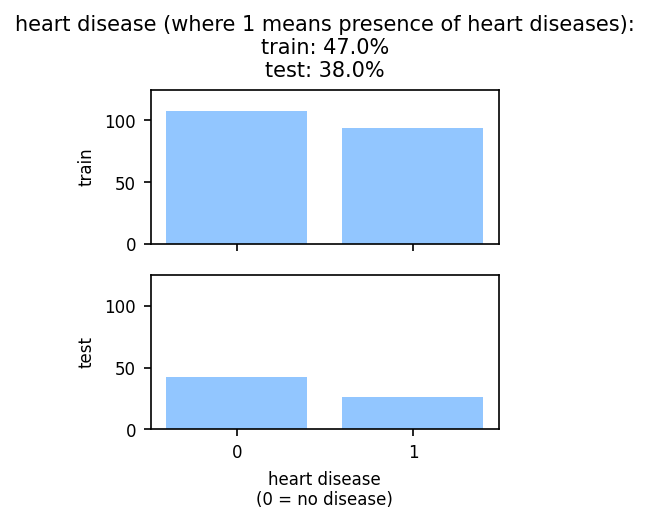

In [42]:
plot_y_ratios(ylr, ytestlr)

We see that ```ytestlr``` has a lower percentage of heart disease (38%), compared to the percentage in the original dataset (44%). Thus, the way we used train/test split made the imbalance (however mild) a little worse for the test set. As discussed before, we would like to perform a split preserving the original proportions among the classes, so we do not have to worry about the possibility of getting poor results due to this fact.

It turns out that ```train_test_split()``` [function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) provides a way to compute splits that try to preserve (as much as it might be possible) the proportions among the classes in the entire dataset. More specifically, the `stratify` parameter takes an *array-like* object that describes all the classes. Thus, we can use the target as this parameter. Below we specify to stratify according to ``y``, and then inspect the resulting split. Notice that this method works for multiple classes as well (i.e., number of classes greater than 2).

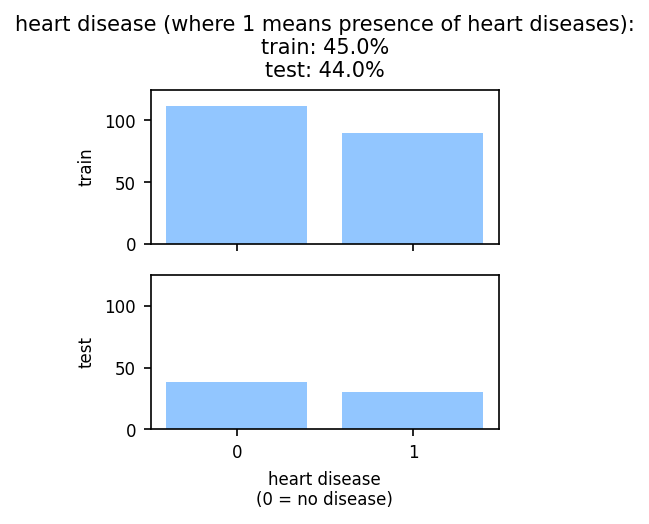

In [43]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, 
                                                                  random_state = 2, 
                                                                  stratify = y)
plot_y_ratios(ylrstrat, ytestlrstrat)

Nearly perfect!  It is always recommended to carry out a detailed EDA on the fetaure matrix, `X`, and consider if the distributions there are of a concern, before moving on to modeling. 

<b> To recap ... </b>, the binary classification problem has been represented as:

- A *design matrix* `X`, with as many rows as there are rows in the dataset, and
as many columns as there are features in the dataset


- A *target vector* `y`, with as many elements as there are rows in the dataset, and it is
such that the i-th value of `y` is the value of the target associated with 
the i-th row of `X`.

A very important fact to consider is this:

*Any <b>supervised</b> problem can be represented by a pair (`X`, `y`), where `X` is a
design matrix, and `y` is a target vector*.

- The values in `y` may be *imbalanced*, and in general it's good practice to ensure the data splits have similar distributions of the target.

Morevover: 

- When the target vector takes non-categorical values, ``(X, y)`` represents a *<b>regression</b>* problem.

- When the target vector takes categorical values, ``(X, y)`` represents a *<b>classification</b>* problem.

**<u>Note</u>**: there are *unsupervised* problems which are represented by a design matrix `X` but there is no corresponding `y`.

Let's continue to build our logistic regression model.

### (c) Create an object of the class associated with the algorithm to be used--in this case LogisticRegression

Construct the `LogisticRegression` object, setting some basic parameters (more on this later). See [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more details. In particular, we will set `solver = 'newton-cg'` and `max_iter = 500`. Note that we are **not** setting `penalty = 'none'` this time. This means that it will take default value of `penalty` parameter, i.e., `penalty ='l2'`. Since default value of `penalty` is activated now, another important parameter, `C`, will also play a role. Since we are also not setting any specific value of `C`, it will also take its default value `C=1.0`. For further details, see the [User Guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) of `sklearn`'s logistic regression scheme.

In [44]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

### (d) Build an actual model using the ``fit `` method from the class associated with the algorithm to be used (using the training set)

In [45]:
clf.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=500, solver='newton-cg')

### (e) Predict with the built model using the ``predict`` method from the class (training set and test set)

In [46]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

### (f) Compute performance metrics for the training and test predictions. In general, the metrics to be used and their interpretation will depend on the application at hand

In [47]:
print("[Test] Accuracy score (ytestlrstrat, y_predict_test):",
      f'{accuracy_score(ytestlrstrat,y_predict_test):.2f}')

[Test] Accuracy score (ytestlrstrat, y_predict_test): 0.81


And compute the metric on the training data:

In [48]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.89


Also show the confusion matrix. For this, we again use sklearn's `confusion_matrix()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Like the last time, we will show the *percentage* associated with the different values of confusion matrix instead of showing the direct output of the `confusion_matrix()`.

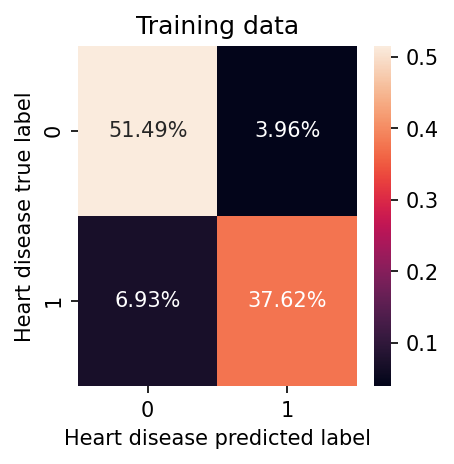

In [49]:
ax = plt.gca()

cm = confusion_matrix(ylrstrat, y_predict_training)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax)
ax.xaxis.set_label_text('Heart disease predicted label')
ax.yaxis.set_label_text('Heart disease true label')
ax.set_title('Training data');

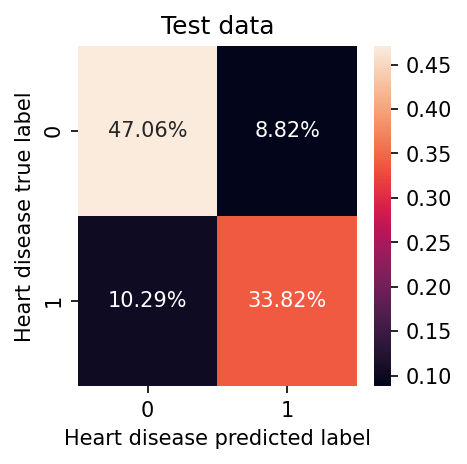

In [50]:
ax = plt.gca()

cm = confusion_matrix(ytestlrstrat, y_predict_test)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax)
ax.xaxis.set_label_text('Heart disease predicted label')
ax.yaxis.set_label_text('Heart disease true label')
ax.set_title('Test data');

As we see from confusion matrix, accuracies for training data (51.49 + 37.62)% ≈ 89% and for test data (47.06 + 33.82)% ≈ 81%  are matching the outputs of `accuracy_score()` function. The false negatives and false positives for both class 0 and class 1 have significantly reduced.

### (g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning

It is common practice to show--when applicable--performance metrics for both the training set and the test set. This means that the model is fitted with the training set, and once fitted, predictions are generated using the training set and the test set, and the corresponding performance metrics are shown (as above), and analyzed. 


*NOTE*: You might want to think of examples of cases when this comparison would *not* be applicable. 


*Hint*: Consider tree-based algorithms such as Random Forest Classifiers [class](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), in particular, you may skim through this [artcile](https://towardsdatascience.com/one-common-misconception-about-random-forest-and-overfitting-47cae2e2c23b) to figure out why **train-test gap** in performance for random forest can be meaningless.

Since our improved logistic regression model's **training accuracy** (``0.89``) is pretty good (meaning, close to 1--or 100%), then one says there is only a small "bias" in the model.

Since the model's **test accuracy** (``0.81``) is decently close to the training accuracy, we would say that there is a small "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well", which means that the model will be well-behaved when new data is presented to it.

Since the gap between training and testing accuracy is about 8%, one might say that the model is slightly over-fitting the data. Thus, in general, one says that a model is *over-fitting* (or just overfitting), when there is an important gap between the training performance and test performance.

Notice two points of nuance in the definition of overfitting: (a) the quantification of *important* depends on the application; and (b) the comparison of training versus test performance can be done (in many cases) across multiple performance metrics. 

These properties are important and desirable.

In the current work, however, there are two possible avenues that we might want to investigate:


- Whether the mild imbalance in the dataset might be affecting the performance of the algorithm  


- Whether the observed mild overfitting can be diminished


Regarding the fisrt bullet, remember that most machine learning classification algorithms assume that data are equally distributed among different classes. So, when we have an imbalanced dataset, then the classifier tends to be more biased towards the majority class and adversely affect the predictions of the minority class which is most likely of primary importance. See, for instance, this [article](https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4) for some review. Feel free to consult with other resources as well to address the concern expressed in the first bullet. We will not delve into this any further since the class imbalance in our data is only mild and it is not of any significance concern.

Below we explore the second bullet. 

### Side-Bar: NEVER EVER use just Accuracy to Measure the Performance of a Classification Algorithm!

In a previous [section](#The-model-building-cycle) where we built our first and simple logistic regression model with only two features, we discussed several performance metrics particularly for classification problems and highlighted briefly why focusing only on accuracy is not a good practice since in some cases it can be misleading. In particular, if the dataset is highly imbalanced, then accuracy becomes a poor indicator of model performance. For example, suppose we were given a data sample of 1000 instances, and 900 of them were class ``1``, and 100 were class ``0``.  

If we defined a model that always predicts class ``1``, such model would have 90% accuracy! But we would be mis-classifying 100% of the class 0 samples--although 10% of the overall data (minority class).  

A good way to avoid this trap is by always generating a confusion matrix for a classification result as we did above. In this section, we will explain the basic concept of confusion matrix in some details. The confusion matrix is simply a table with the true class labels on one axis, and the predicted labels on the other axis.  The counts for each combination of true vs. predicted are put in each cell of the table.  For our hypothetical case, the confusion matrix is:

<img src = "images/Confusion_Matrix.jpg" alt = "confusion matrix" style="width: 400px;"/>

Note that the diagonal intersections of the classes are the "correct" predictions (i.e. Predicted 0 intersection wiht Actual 0, and Predicted 1 intersection with Actual 1), and in this case since the model never predicts 0, there are no "correct" predictions for class `0`. It is easy to see that the model isn't working well, even though the accuracy score is 90%.  The confusion matrix in this case provides much more information in an easy-to-interpret format.  ``Scikit-learn`` provides the ``confusion_matrix()`` and ``ConfusionMatrixDisplay()`` methods (ref: [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)) to generate the results for us.  Here we apply them to the previous model results -- the direct output of `confusion_matrix()` without showing the corresponding percentage values that we showed earlier:

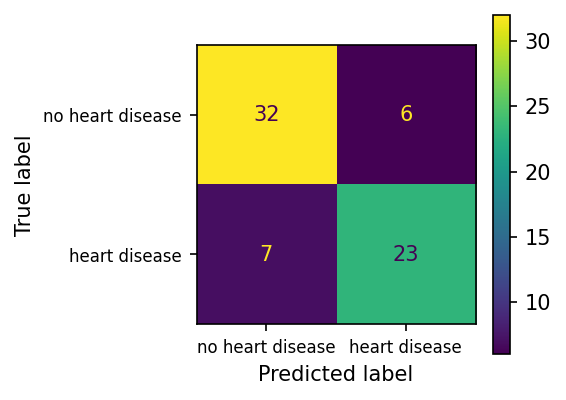

In [51]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax);

Here, we added human readable labels (as compared to just 0 or 1) for convenience. From the chart we can see that while the overall accuracy was 81%, when we predict heart disease, 21% (6 of 29) of the time we are predicting a false positive, while the false negatives (predicting no disease when in fact there is heart disease) is about 18% (7 of 39). This information can be discussed with stakeholders to decide which is more important, reducing **false positives** or **false negatives**, assuming overall accuracy is acceptable. We can also use the ``classification_report`` method from earlier on this case--and notice that all the metrics in the report (precision, recall, and f1-score) can be computed from the values in the confusion matrix as we discussed earlier in a [subsection](#The-model-building-cycle) on our simple logistic regression model with two input features:

In [52]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       112
           1       0.90      0.84      0.87        90

    accuracy                           0.89       202
   macro avg       0.89      0.89      0.89       202
weighted avg       0.89      0.89      0.89       202



In [53]:
print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.79      0.77      0.78        30

    accuracy                           0.81        68
   macro avg       0.81      0.80      0.81        68
weighted avg       0.81      0.81      0.81        68



When the training accuracy is good, the test accuracy is somewhat worse than the training result. In such a case, we call that the model is slightly "overfitting" the training set as we discussed earlier. When there is evidence of overfitting, one must analyze the situation and suggest the course of action, typically aimed at "relaxing" the model--i.e., making it less strict.  This can seem counterintuitive at first!

Typically, the test accuracy, even when it is close to the training accuracy, tends to be smaller (worse) than the training accuracy (better).

When the test accuracy is significally better than the training accuracy, this would justify a review of the code to see if there is a bug. In such a case, plotting the performance results with multiple (random) splits of the same data would be one way to start investigating.

The code below shows one simple way to do it.

In [54]:
#
# here we try multiple splits and see the effects, with the same proportion 75% train and 25% test
#
# keep lists for training accuracy, 
#                test accuracy, 
#                and the difference between the latter and the former
#
def multiple_splits_model(X,y, C = None):
    training_accuracy = []
    test_accuracy = []
    accuracy_difference = []
#
# define number of trials
#
    n_splits = 25
#
# define LogisticRegression object
#
    if C is not None:
        print(f'\nRegularization parameter: C = {C}\n')
        clf = LogisticRegression(C = C, solver = 'newton-cg', max_iter = 500)
    else:
        print(f'\nRegularization parameter: C = 1\n')
        clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)
#
# loop over multiple trials
#
    for i in range(0, n_splits):
#
# perform a split for this iteration, 
# using different random_state for every iteration
# this ensures each split is likely to be unique
#
        Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = i+100)
#    
# fit the Classifier on the training set
#
        clf.fit(Xlr, ylr)
#
# predict the labels for the training data
#
        y_predict_training = clf.predict(Xlr)
#
# predict the labels for the test data
#
        y_predict_test = clf.predict(Xtestlr)
#
# save training set accuracy for this split
#
        tr_accuracy = accuracy_score(ylr,y_predict_training)
        training_accuracy.append(tr_accuracy)
#
# save test set accuracy for this split
#
        tst_accuracy = accuracy_score(ytestlr,y_predict_test)
        test_accuracy.append(tst_accuracy)
#
# save difference between the two acuracy values
#
        accuracy_difference.append(tst_accuracy - tr_accuracy)
    
    return n_splits, training_accuracy, test_accuracy, accuracy_difference, ylr, y_predict_training, ytestlr, y_predict_test

In [55]:
# Let's call the function now
n_splits, training_accuracy, test_accuracy, accuracy_difference, ylr, y_predict_training, ytestlr, y_predict_test = multiple_splits_model(X,y)


Regularization parameter: C = 1



The custom function above, `multiple_splits_model(X,y)`, generates 25 repetitions by varying the train-test split indices of the provided data `(X,y)`, and then returns `n_splits`, `training_accuracy`, `test_accuracy`, `accuracy_difference`, `ylr`, `y_predict_training`, `ytestlr`, and `y_predict_test`. Now we plot all the repetitions for both the training and test data, to compare the results.

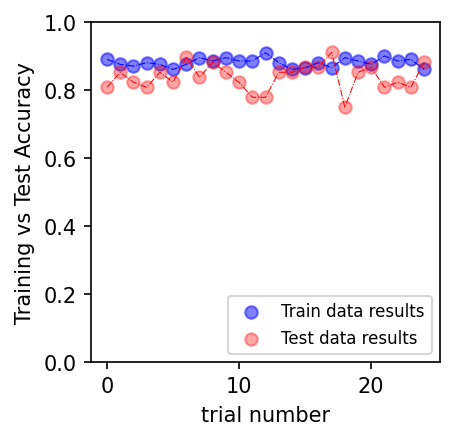

In [56]:
fig, ax = plt.subplots()
ax.scatter(range(len(training_accuracy)),
           training_accuracy, 
           color = 'blue', 
           alpha = 0.5,
           label = 'Train data results')
ax.plot(range(len(training_accuracy)),
        training_accuracy, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_accuracy)),
           test_accuracy, 
           color = 'red', 
           alpha = 0.35, 
           label = 'Test data results')
ax.plot(range(len(test_accuracy)),
        test_accuracy, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Training vs Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

In [57]:
print(f'\n[Training] accuracy statistics over {n_splits} random splits: (mean: {round(np.mean(training_accuracy),2)}, std: {round(np.std(training_accuracy),2)})\n')

print(f'\n[Test] accuracy statistics over {n_splits} random splits: (mean: {round(np.mean(test_accuracy),2)}, std: {round(np.std(test_accuracy),2)})\n')


[Training] accuracy statistics over 25 random splits: (mean: 0.88, std: 0.01)


[Test] accuracy statistics over 25 random splits: (mean: 0.84, std: 0.04)



Note that the accuracy on the train split is relatively constant at about 0.88 units with very small amount (0.01 units) of standard deviation (about 1% of mean training score). This is generally expected since the model is given the train data to fit. On the other hand, the test results vary somewhat more (standard deviation is about 0.04 units, i.e., about 5% of mean test score of 0.84 units). Another way to look at these results is to plot the difference between the test accuracy and the train accuracy, which is done here.

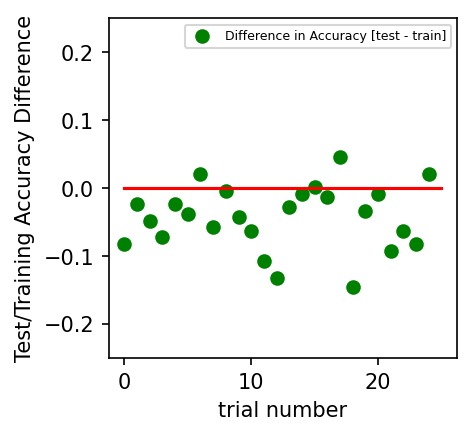

In [58]:
fig, ax = plt.subplots()
ax.scatter(range(len(accuracy_difference)),
           accuracy_difference, 
           color = 'green', 
           label = 'Difference in Accuracy [test - train]')
ax.plot([0, len(accuracy_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test/Training Accuracy Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()

In [59]:
round(max(np.abs(accuracy_difference)),2)

0.15

In this case, the test accuracy turns out to be sometimes (about 3 times; the three green dots above the red line) better, but not by very much. There is a maximum *absolute* difference of no more than 0.15 units.  We've already noted that accuracy isn't always a good measure of model performance, and shown the use of the confusion matrix. Additional performance measures are provided by `sklearn` in the ``classifcation_report`` function (ref: [sklearn.metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)), including ``precision``, ``recall``, and ``f1-score``, all of which we also discussed earlier along with particular situations when these additional metrics must be considered.  Note that if desired, we could graph multiple classification performance metrics similarly to the accuracy difference plot above. We won't do a deep dive on metrics here, but below we use the ``classification_report`` method to demonstrate the additional metrics. Note that since we didn't store the intermediate models, the following outputs results from the *last* of the 25 trials performed.

In [60]:
print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))
#
print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       112
           1       0.88      0.80      0.84        90

    accuracy                           0.86       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.86      0.86      0.86       202

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.87      0.87      0.87        30

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68



With the more detailed classification report, we see that the test metrics are slightly better for the than training metrics. If we look back at the two plots, then we will notice the *last* point of test accuracy (red point) is slightly higher than that of train accuracy (blue point), or the *last* point of the *accuracy difference plot* is above the red line. Clearly, such slightly better accuracy of the test set *cannot* be considered as typical or representative result. This is simply a random effect. We cited a few online and short discussion on references earlier on classification metrics. If you are further interested, please refer to the [ISLR book](http://www-bcf.usc.edu/~gareth/ISL/). The Wikipedia article is another good resource to review (see [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)).

## Logistic Regression Parameters in `scikit-learn`

Remember that `help(object)` in Python returns documentation and relevant details of the object.  If the object is a class from a large package like `scikit-learn`, you generally will get a version of the documentation similar to what you might find searching online. By using `help()`, you are sure to get the information for the exact version you are using.  Here, let us use `help(LogisticRegression)` to get information about this class from `scikit-learn` version that you are using here. The online version (may not be the same as the one you are using) is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [61]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
del sklearn # We do not need the entire scikit-learn package.

The scikit-learn version is 1.1.1.


In [62]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

You see in the help documentation all the paramters for which you can assign values to affect the behavior of the class when you use it.  In the above output, you are shown (among others) a few relevant parameters. We've omitted ones not of interest here--but you can experiment with other parameters as well!
  
`penalty = 'l2'`  
`C = 1.0`  
`fit_intercept = True`  
  
The values given after the equal sign are the default values; further down in the documentation each parameter is defined and the possible / allowed values are detailed.  

### Tuning the Model

We've just seen that the scikit-learn logistic regression model has some adjustable parameters (*hyperparameters*) we can tune to optimize performance of the classifier. Keep in mind that optimizing performance means we want to minimize the gap between the model performance on the training set and the test/validation set (as a seperate note, remember that that test set and validation set are different; see [here](https://machinelearningmastery.com/difference-test-validation-datasets/) for details). It's possible to get a very good score on the training set but **not** on the test set, due to what is called "overfitting".  Overfitting refers to the case where the training performance is significantly higer than the test performance--this is caused by the model "memorizing" the training data. For tuning the parameters of our model, it is often recommended to use a mix of **cross-validation** and **grid search**. In Logistic Regression, the most important parameter to tune is the *regularization parameter* ``C``. This regularization parameter is used to control for unlikely high regression coefficients, by adding a "penalty" to the loss term when the coefficients get larger.  For `sklearn`'s ``LogisticRegression``, ``C`` is the "inverse regularization strength", meaning smaller ``C`` constrains the paramters more. Also note that the actual functional form of penalty or regularization is determined by the `penalty` argument, which defaults to ``l2``. The "l2" regularization uses a value ($\lambda$) multipled by the sum of the squares of the model coefficients.  The "l1" regularization multiples $\lambda$ by the sum of the absolute values of the weights. The "l2" regularization is also called Ridge regularization (see section 3.4 and equation 3.41 in [The Elements of Statistical Learning](https://hastie.su.domains/Papers/ESLII.pdf)) and "l1" regularization is called Lasso regularization (see section 3.4 and equation 3.52, ibid). In addition, you can (and should) refer to the "Section 1.1.11. Logistic regression" of sklearn's [user guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) to understand how "l1" and "l2" regularizations are implemenetd in sklearn. So by default, smaller values of ``C`` will result in "l2" regularization with larger $\lambda$ and a greater penalty on the larger model coefficients. Lastly, note that the default value for ``C`` is 1, and along with the default penaly "l2", means scikit-learn Logistic Regression uses regularization in default setting. If you would like to build Logistic Regression models without regularization, you should set `penalty = 'none'` (ref: [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) or can consider statsmodels (ref: [statsmodels.discrete.discrete_model.Logit](https://www.statsmodels.org/stable/discretemod.html)).

We will now implement some code to perform model tuning and selecting the regularization parameter ``C``.

### Side-Bar: Cross Validation

Recall earlier we showed that across 25 splits the train and the test scores varied. The process of cross-validation is very similar. As usual, we first split the entire data into two sets: training and test. We can call them as the *oroginal* training and test sets. We then split this *original* training set into `k` smaller sets. The following procedure is then followed for each of the `k` smaller sets:

- A model is trained using `k-1` of the smaller sets (*training data*), while keeping one of the sameller sets aside;
- the resulting model is *validated* on the smaller set that was kept aside (*validation data*); note that the *training data* consisting of `k-1` smaller sets and the *validation data* consisting of the remaining smaller set form the entire *original* training set (i.e., the *validation data*, a small part of the *oroginal* training data, is used as an *intermediate* test set to compute a performance measure, such as accuracy, in the repetitive process of cross-validation).

Note that we still hold out the *original test* set separately for final evaluation. Please refer to "Section 3.1. Cross-validation: evaluating estimator performance" in `sklearn`'s [user guide](https://scikit-learn.org/stable/modules/cross_validation.html) for details. The performance metrics computed over `k` folds [a *fold* in this case just means a different split (in this case a random split) of the *original* training data] are typically averaged and the average value is reported as hopefully representative of what the model will do in the future on new data. The key idea behind cross validation is to avoid choosing a "lucky" split that happens to give great performance on the data at hand but does poorly later. Since the scores vary across `k` folds, it's assumed that the best score or the worst score aren't as likely to represent a future score for an unseen dataset. Some Data Scientists also report the standard deviation of the cv scores as a further measure of how confident they are in the score.

<b>To summarize</b>:
- the entire data are split into *original* train and test sets
- the *original* train set are split into `k` folds and the following two steps are carried out for each of the `k` folds
    + a model is fit to `k-1` folds of the original train data
    + the model is scored on the remaining fold, i.e., the validation data 
- the average (and sometimes standard deviation) of the score over the `k` folds is reported as the cv score

We will now use the following custom function, `cv_score()`, to perform our k-fold cross-validation and apply a scoring function to each validation fold. The function generates five different splits, `k=5` (i.e. 5-fold cross-validation), fits a classifier each time (note that the classifier is passed as a parameter to the function, so we can define it as anything that has a ``fit`` and ``predict`` method), and computes the "score", which by default is set to ``accuracy_score`` (note though that accuracy may not be the best performance metric for this work as we explained earlier; it depends on the stakeholders). Sklearn's `StratifiedKFold` class (ref: [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)) is used in the custom function, `cv_score()`, to return sets of indices (*not* the splits of the *original training data*) by **preserving the percentage of samples for each class**. First, the whole set of indices is generated outside the `for` loop. Next, on each pass of the `for` loop, the entire set of indices are splitted using `StratifiedKFold`, and then passed as the vectors `train_index` and `test_index` to define the actual splits of the `x` and `y` data. The scores are summed up in ``result``, and then the average is returned.

We reiterate again that the train/test split, that is done in the `cv_score()` custom function, should not be confused with the *original* train/test split that we do before building the model. As you will notice below, when `cv_score()` is called, it is called with parameters, `X_train`, and `y_train`, that are assigned to the local parameters, `x` and `y`, of the custom function `cv_score()`. The parameters,  `X_train` and `y_train`, come from the *original* split of the entire dataset `(X, y)`. Thus, the `cv_score()` function never "sees" `X_test` and `y_test` which are hold out separately for final evaluation.

In [63]:
def cv_score(clf, x, y, score_func = accuracy_score):
    nfold = 5
    validation_accuracy = []
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train_index, test_index in StratifiedKFold(nfold, shuffle = True,
                             random_state = 42).split(x,y):
        clf.fit(x.loc[train_index, :], y[train_index])
        valid_accuracy = score_func(clf.predict(x.loc[test_index, :]), y[test_index])
        validation_accuracy.append(valid_accuracy)
    return validation_accuracy

Below is an example of using the `cv_score()` function for a basic logistic regression model with default regularization "l2", i.e., `penalty = 'l2'`.

In [64]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = 2)

Note that this split is using the same `random_state=2` that we used earlier in the previous [section](#(b)-Perform-train/test-split-on-$(X,-y)$).

In [65]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)
score = np.mean(cv_score(clf, Xlr, ylr))
print(f'average accuracy: {round(score,2)}')

average accuracy: 0.84


It's very important to understand this result. Earlier we showed that with random 25 splits, the train and test score would vary, and in our case the test score varied more than the train score. The key idea of cross-validation (CV) is to estimate a representative accuracy score for possible unseen data by considering multiple splits of the available *training* data, similar to what we previoulsy did with 25 random splits of the *whole* data. In the CV procedure, we defined `cv_score()` custom function to return the *average* validation score across all the `k` folds as cross-validation (CV) score. This CV score most likely represents model performance on unseen data. However, the actual results on the unseen data (such as the hold out the *original test* set) will still vary because of inherent uncertanties in the unseen data. Note that the CV score of 0.84 is in between what we obtained earlier for *one* random train set (0.89) and the test set (0.81); see this [Section](#Side-Bar:-NEVER-EVER-use-just-Accuracy-to-Measure-the-Performance-of-a-Classification-Algorithm!). However, this was not the case for *another* random split (the *last* split of those 25 splits; refer to the very end of this [Section](#Side-Bar:-NEVER-EVER-use-just-Accuracy-to-Measure-the-Performance-of-a-Classification-Algorithm!)) for which we have test accuracy as 0.88 and train accuracy as 0.86 -- both of which are slightly higher than the CV score of 0.84. Clearly, the scores like 0.89 or 0.86 etc. for different random splits are simply because of randomization and cannot be considered a representative accuracy score on some unseen data. The CV score of 0.84, obtained as an average of the validation scores of `k` folds of the *training* data, rather represents a better estimate of score on unseen data.

Now, recall that so far we have used the default value of `1.0` for the regularization parameter, `C`, with "l2" regularization (default value of the `penalty` parameter). Is this default value of `C` the best choice? Given that we now have the custom function, `cv_score()`, we can readily investigate it by considering a set of different values of `C`. Choosing optimal parameters for ML or statictical model is an important task. Let's find this optimal `C` by carrying out the following task.

<div class="span5 alert alert-info">
<h3>Task Set II</h3>

Implement the following search procedure to find a good model
<ul>
  <li> Consider a list of possible values of $C: [0.001, 0.1, 1, 10, 100, 1000, 10000]$
  <li> For each C:
    <ul>
      <li> Create a logistic regression model with that value of $C$
      <li> Find the average validation score for this model using the <b><i>cv_score()</i></b> function by considering only the training set $(Xlr, ylr)$
    </ul>
  <li> Pick the $C$ with the highest average validation score
</ul>
The goal here is to find the best model parameters based <b>only</b> on the training set, without showing the model the test set at all (which is why the test set is also called a <b>hold-out</b> test set).  
<br>
<br>
<b> Comment on the result vs. what we had before.
</div>

Let us write a function, `grid_search_CV()`, to carry out this task of selecting the best `C` with the highest average validation score, i.e., the best cross-validation (CV) score.

In [66]:
def grid_search_CV(C_range, Xtrain, ytrain, verbose = 0):

    best_score = 0
    best_C = float("NaN")

    for C in C_range:
        clf = LogisticRegression(C = C, solver = 'newton-cg', max_iter = 500)
        score = np.mean(cv_score(clf, Xtrain, ytrain))
    
        if score > best_score:
            best_score = score
            best_C = C

        if verbose == 1:
            # Retrieve the model parameters.
            # Source: https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
            clf.fit(Xtrain, ytrain)
            b = clf.intercept_[0]
            w_vec = np.ravel(clf.coef_)
    
            print(f"\nC = {C}, score = {round(score,2)}, intercept = {round(b,2)}, dot_product = {round((1/2)*np.dot(w_vec,w_vec),4)}")
    
    if np.isnan(best_C):
            raise ValueError('List of C did not produce score greater than 0.')
            
    if verbose == 1:
        print(f"\nThe best parameter is C = {best_C} with accuracy = {round(best_score,2)}.\n")
        
    return best_score, best_C

In [67]:
# The grid of parameters to search over
C_range = np.logspace(start=-3, stop=4, num=8)

# Let's call the function
best_score, best_C = grid_search_CV(C_range,Xlr, ylr, verbose = 1)


C = 0.001, score = 0.71, intercept = 0.79, dot_product = 0.0027

C = 0.01, score = 0.78, intercept = -0.05, dot_product = 0.0893

C = 0.1, score = 0.83, intercept = -2.3, dot_product = 0.9969

C = 1.0, score = 0.84, intercept = -5.2, dot_product = 3.5401

C = 10.0, score = 0.84, intercept = -6.7, dot_product = 6.0232

C = 100.0, score = 0.84, intercept = -7.32, dot_product = 7.4125

C = 1000.0, score = 0.84, intercept = -7.89, dot_product = 10.1655

C = 10000.0, score = 0.84, intercept = -8.51, dot_product = 15.4015

The best parameter is C = 10.0 with accuracy = 0.84.



First note that there is not much difference in accuracy for `C` greater than or equal to 0.1 because all the corresponding accuracy scores are close to 0.83 or 0.84. In that sense, any `C` greater than or equal to 0.1 will practically have similar predictive power for some unseen data such as the hold-out test set.

Before proceeding further, let's us also check the accuracy for a model *without* any penalty term. In this case, the mathematical formulation is done by considering a very large value of `C` (see the "Note" in [Section 1.1.11. Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) of the `sklearn`'s User Guide on logistic regression). But, seeing the pattern above how the CV score is evolving with increasing value of `C`, we can expect that the CV with no penalty will be about 0.84.

In [68]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty = 'none')
score = np.mean(cv_score(clf, Xlr, ylr))

clf.fit(Xlr, ylr)
b = clf.intercept_[0]
w_vec = np.ravel(clf.coef_)
print(f"\nNo penalty, score = {round(score,2)}, intercept = {round(b,2)}, dot_product = {round((1/2)*np.dot(w_vec,w_vec),4)}")


No penalty, score = 0.84, intercept = -3.38, dot_product = 35.489


Great! As we expected, the accuracy score is 0.84 when there is no regularization or penalty term.

Thus, based on above grid searcg CV analysis, the best value of `C` is found to be 10, or practically any `C` greater than or equal to 0.1 will work since for all these values of `C` we have CV score close to 0.83 or 0.84. We would expect to observe similar score (except for some random variation) for the hold-out test set.

<div class="span5 alert alert-success">
    <b>Comment</b>:<br>
    <p>For the best value of <b><i>C</i></b>, we obtained our CV score as 0.84. The 5-fold CV scheme, that was implemented to determine this score, used <b>a</b> random training data. This training data was obtained from <b>a</b> random train/test split based on <b><i>random_state = 2</b></i> in the <b><i>train_test_split()</b></i> function. In contrast, we earlier obtained a train accuracy of 0.89 and test accuracy of 0.81 for the <b>same</b> train-test split [because we used then <b><i>random_state = 2</i></b>]. In that earlier case, no cross-validation scheme was, however, involved, and also the default value of <b><i>C</i></b> as 1.0 was used. Since the higher test accuracy score (0.89) was simply observed for <b>a</b> random train-test split, this cannot be considered as representative accuracy scores for some unseen data.
    </p>
</div>

Now, the next thing to do is to evaluate the model with best parameter on the test data. The relevant steps are sketched in the following task.

<div class="span5 alert alert-info">
<h3>Task Set III</h3>
To estimate how the best model will perform on unseen data (in this case, the <b>hold-out</b> test set), simply execute the similar steps as we have been doing so far:
<ul>
  <li> Use the best <b><i>C</i></b> obtained from Task II above and train the Logistic Regression model on the <i>entire</i> training data
  <li> Calculate the accuracy on the <b>hold-out</b> test set
</ul>

Next,
<ul>
<li> Comment on the results explaining if performance of the best value of <b><i>C</i></b> is of any concern
<li> Also explain the necessity of cross-validation and grid search
</ul>

</div>

Let us write a custom funciton `calculate_accuracy()` that will accept the the classifier and *a* train/test split. It will then fit the train split to the classifier, and next report the train and test accuracy scores.

In [69]:
def calculate_accuracy(classifier, Xtrain, Xtest, ytrain, ytest, verbose = 0):

    classifier.fit(Xtrain, ytrain)

    y_predict_training = classifier.predict(Xtrain)
    y_predict_test = classifier.predict(Xtest)

    tr_accuracy = accuracy_score(ytrain, y_predict_training)
    tst_accuracy = accuracy_score(ytest,y_predict_test)
    
    if verbose == 1:
        print(f"\tTrain accuracy = {round(tr_accuracy,2)}, Test accuracy = {round(tst_accuracy,2)}")
    
    return tst_accuracy

We can now use the best value of `C` and the default value of `C` (or, in fact, any other value of `C`) to construct the classifier and then pass the classifier to the above function along with any train/test split to calculate the corresponding accuracy scores for the **hold-out test set** as well as for the entire training set. Let's calculate the scores for a few values of `C`'s.

In [70]:
C = best_C
best_classifier = LogisticRegression(C = C, solver = 'newton-cg', max_iter = 500)
print(f"\nFor C = {C}:")
_ = calculate_accuracy(best_classifier, Xlr, Xtestlr, ylr, ytestlr, verbose = 1)


default_classifier = LogisticRegression(solver = 'newton-cg', max_iter = 500)
print(f"\nFor default C = 1.0:")
_ = calculate_accuracy(default_classifier, Xlr, Xtestlr, ylr, ytestlr, verbose = 1)

C = 0.1 # 10, 0.1
another_classifier = LogisticRegression(C = C, solver = 'newton-cg', max_iter = 500)
print(f"\nFor C = {C}:")
_ = calculate_accuracy(another_classifier, Xlr, Xtestlr, ylr, ytestlr, verbose = 1)

C = 0.001
yet_another_classifier = LogisticRegression(C = C, solver = 'newton-cg', max_iter = 500)
print(f"\nFor C = {C}:")
_ = calculate_accuracy(yet_another_classifier, Xlr, Xtestlr, ylr, ytestlr, verbose = 1)


For C = 10.0:
	Train accuracy = 0.9, Test accuracy = 0.79

For default C = 1.0:
	Train accuracy = 0.89, Test accuracy = 0.81

For C = 0.1:
	Train accuracy = 0.88, Test accuracy = 0.82

For C = 0.001:
	Train accuracy = 0.74, Test accuracy = 0.68


We note that the test/train accuracy is very similar for all values of `C` greater than or equal to `0.1`, while the accuracy scores drops significantly down when we choose `C = 0.001` less than `0.1`. 

In [71]:
print(f"\n[Cross-validation]: Validation accuracy for each fold for best classifier: {np.round(cv_score(best_classifier, Xlr, ylr),3)}\n")


[Cross-validation]: Validation accuracy for each fold for best classifier: [0.805 0.829 0.875 0.875 0.825]



<div class="span5 alert alert-success">
    <b>Comment</b>:<br>
    <p>The best value of <b><i>C = 10</i></b>, which produced a CV score of 0.84, may not do as well as a default model because of randomization. This value was chosen based on <b>a</b> training set that was generated using <b><i>random_state = 2</i></b>. In fact, in the CV process (see the function <b><i>cv_score()</i></b>), this best value of <b><i>C </i></b> produced 5 different validation accuracy scores as follows $[0.805, 0.829, 0.875, 0.875, 0.825]$ (see the output of the Code Line# 71 above), whose average (0.84) is reported as the CV score. The best value of <b><i>C = 10</i></b> yields a score of 0.79 for the hold-out test set as shown in the output  shown in the output of Code Line# 70. This test accuracy for this <b>particular</b> random test split happens to be lower than the CV score of 0.84. This can happen because of the natural variation in the data.</p>
</div>

We noted above that the best value `C` was obtained for a particular train/test split associated with `random_state = 2` through grid search and CV analyses. If we would have considered a different `random_state`, would our best value of `C` and the corresponding CV score have been different? Yes, they would be different. But, we should still expect that the difference in model performance (with different best values of `C`) associated with different values of `random_state`; thus a different train/test split) would *not vary significantly* from each other. The adverse effect of randomization should be mitigated (there will still, however, be some minor difference in performance due to inherent variability in the data). This would demosntarte the power of cross-validation and grid search analysis.

To show this, let us consider 25 random splits of our data and carry out the steps to compute the best `C` for each of this random splits and the corresponding CV score. In addition to this, we would also comoute the test scores for a few values of `C` (mainly 0.001, 0.1, 1.0, and 10.0) for all the 25 splits. This last step will help us to figure out if our earlier observation, that any `C` greater than or equal to 0.1 will practically produce similar results on some unseen data, is correct or not.

In [72]:
#
# define number of trials
#
n_trials = 25

# Initialize
CV_accuracy = []
test_accuracy_CV = []
best_C_parameters = []

test_accuracyC0 = []
test_accuracyC2 = []
test_accuracyC3 = []
test_accuracyC4 = []
test_accuracy_noPenalty = []

#
# loop over multiple trials
#
for i in range(0, n_trials):

    # perform a split for this iteration, 
    # using different random_state for every iteration
    # this ensures each split is likely to be unique
    #
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify = y, random_state = i+150)

    # Let's call the function grid_search_CV() function
    best_score, best_C = grid_search_CV(C_range, Xtrain, ytrain)
    
    # save best_score and best_C for this split
    #
    CV_accuracy.append(best_score)
    best_C_parameters.append(best_C)

    # define LogisticRegression object with best_C
    #
    best_clf = LogisticRegression(C = best_C, solver = 'newton-cg', max_iter = 500)
    
    # compute and save test set accuracy for this split when C = best_C
    #
    tst_accuracy = calculate_accuracy(best_clf, Xtrain, Xtest, ytrain, ytest)
    test_accuracy_CV.append(tst_accuracy)
    
    # Also compute and save test set accuracy for each element of C_range for this split
    #
    for j in range(0, len(C_range)):
        if j == 0 or j == 2 or j == 3 or j == 4:
            clf = LogisticRegression(C = C_range[j], solver = 'newton-cg', max_iter = 500)
            tst_accuracy = calculate_accuracy(clf, Xtrain, Xtest, ytrain, ytest)
            
            if i == 0:
                print(f"C_range[{j}]: {C_range[j]}")
        
        if j == 0:
            test_accuracyC0.append(tst_accuracy)
            
        elif j == 2:
            test_accuracyC2.append(tst_accuracy)
            
        elif j == 3:
            test_accuracyC3.append(tst_accuracy)
            
        elif j == 4:
            test_accuracyC4.append(tst_accuracy)
    
    clf = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty = 'none')
    tst_accuracy = calculate_accuracy(clf, Xtrain, Xtest, ytrain, ytest)
    test_accuracy_noPenalty.append(tst_accuracy)

print(f"\nC_range: {C_range}")
print(f"\nmin(best_C_parameters), max(best_C_parameters): {min(best_C_parameters), max(best_C_parameters)}\n")

C_range[0]: 0.001
C_range[2]: 0.1
C_range[3]: 1.0
C_range[4]: 10.0

C_range: [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]

min(best_C_parameters), max(best_C_parameters): (0.1, 10.0)



We see that out of all the values of `C` selected in `C_range`, that were used in the grid search analysis, minimum value of best `C` is 0.1 and maximum value of best `C` is 10 over all the 25 random train/test splits.

Let us now plot the CV score associated with these different best values of `C` and the test accuracy of the corresponding test split as we change `random_state` which produces different train/test split.

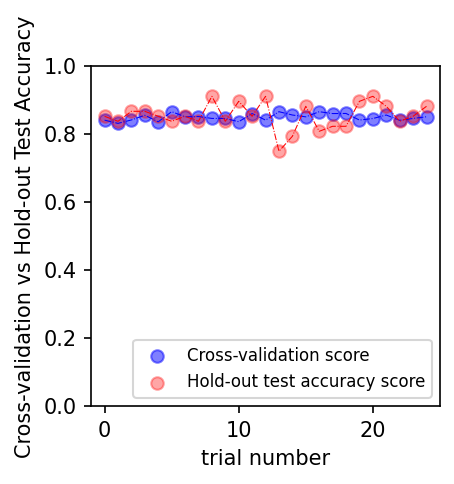

In [73]:
fig, ax = plt.subplots()
ax.scatter(range(len(CV_accuracy)),
           CV_accuracy, 
           color = 'blue', 
           alpha = 0.5,
           label = 'Cross-validation score')
ax.plot(range(len(CV_accuracy)),
        CV_accuracy, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_accuracy_CV)),
           test_accuracy_CV, 
           color = 'red', 
           alpha = 0.35, 
           label = 'Hold-out test accuracy score')
ax.plot(range(len(test_accuracy_CV)),
        test_accuracy_CV, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Cross-validation vs Hold-out Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlim(-1, 25)
ax.set_xlabel('trial number')
plt.show()

We see that CV score stays pretty much constant over different random splits, while the hold-out test accuracy has slightly more variations than the *almost* constatnt CV score. Nonetheless, the test scores are mostly close to the corresponding CV score (barring some splits because of inherent uncertainties in the data). In fact, if you contrast this plot with a similar plot for 25 trials that we included earlier in this [Section]((#Side-Bar:-NEVER-EVER-use-just-Accuracy-to-Measure-the-Performance-of-a-Classification-Algorithm!)), you will notice that the test scores there were mostly lower than the train scores. **The grid search and CV analyses helped us to reduce the gap between the performance at the training stage and the test performance**. But, we would still see some deviations in test accuracy from the CV score due to inherent uncertainties in the data.

In the next plot, let us come back to the point that we noted earlier that the model performance for any `C` greater than or equal to 0.1 is same for practical purpose regardless of the random choice of train/test split used in estimating the best value of `C`. To show this, we plot below the test accuracy for a few values of `C` greater than and equal to 0.1 and one value of `C` less than 0.1 over all the 25 random train/test splits we considered above.

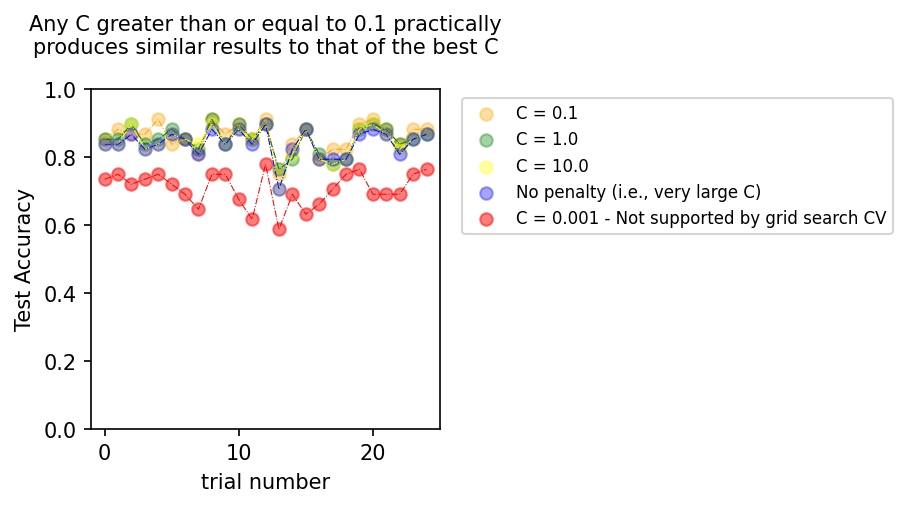

In [74]:
fig, ax = plt.subplots()

# All the following parameters including the 'no penalty' (i.e., large C) practically 
# produce very similar results per grid search CV analyses
ax.scatter(range(len(test_accuracyC2)),
           test_accuracyC2, 
           color = 'orange', 
           alpha = 0.35, 
           label = f'C = {C_range[2]}')
ax.plot(range(len(test_accuracyC2)),
        test_accuracyC2, 
        color = 'orange', 
        linestyle = '-.',
        linewidth = 0.5)

ax.scatter(range(len(test_accuracyC3)),
           test_accuracyC3, 
           color = 'green', 
           alpha = 0.35, 
           label = f'C = {C_range[3]}')
ax.plot(range(len(test_accuracyC3)),
        test_accuracyC3, 
        color = 'green', 
        linestyle = '-.',
        linewidth = 0.5)

ax.scatter(range(len(test_accuracyC4)),
           test_accuracyC4, 
           color = 'yellow', 
           alpha = 0.35, 
           label = f'C = {C_range[4]}')
ax.plot(range(len(test_accuracyC4)),
        test_accuracyC4, 
        color = 'yellow', 
        linestyle = '-.',
        linewidth = 0.5)

ax.scatter(range(len(test_accuracy_noPenalty)),
           test_accuracy_noPenalty, 
           color = 'blue', 
           alpha = 0.35, 
           label = 'No penalty (i.e., very large C)')
ax.plot(range(len(test_accuracy_noPenalty)),
        test_accuracy_noPenalty, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)

# This parameter is NOT supported by grid search CV analysis
ax.scatter(range(len(test_accuracyC0)),
           test_accuracyC0, 
           color = 'red', 
           alpha = 0.5,
           label = f"C = {C_range[0]} - Not supported by grid search CV")
ax.plot(range(len(test_accuracyC0)),
        test_accuracyC0, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)

ax.legend(bbox_to_anchor=(1.04,1),fontsize = 8, loc = "upper left")
ax.set_ylabel('Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlim(-1, 25)
ax.set_xlabel('trial number')
ax.set_title('Any C greater than or equal to 0.1 practically\n' +
                'produces similar results to that of the best C\n',
              fontsize = 10)
plt.show()

The plot above clearly demonstrates that for all the 25 train/test splits any `C` greater than or equal to 0.1 practically produces similar results to that of the corresponding best `C`. When we considered `C = 0.001` less than 0.1, the test accuracy deteriorates significantly. This shows that any `C` greater than or equal to 0.1 provides performance *almost* equivalent to the best `C` once we selected *a* particular train/test split for our grid search and CV analyses. 

How do we then further reduce the effects of uncertainties in test accuracy as noted in the above plot? We should first carefully investigate the *particular* train/test split (i.e., trial number around 14) for which the CV score and the test accuracy deviate significantly from the other splits. There seem be a level of variability in that particular split which is different from the remaining splits. Beside, there are only 270 records in the data set. It's possibly not significant enoguh for classification with 13 features. We might require more data. Another possible option is to try different classification algorithms such as support vector machine, or neural netwrok to see if they can improve model performance.

<div class="span5 alert alert-success">
    <b>Comment on the Importance of Cross-validation and Grid Search</b>:<br>
    
    <p>The performance of the best value of <b><i>C</i></b> on test data may not be as well as the that of the default model because of randomization and also because the best value was chosen based on the training data. There will be natural variation when applied to the test set. We have seen from our analysis above that the test score may be slightly higher or lower than the corresponding CV score depedning on different random splits of our data. </p>

<p>One of the reason we do cross-validation and grid search because we have a large search space of parameters and we have no guidance on how to restrict the search space. With some domain expertise, we may be able to restrict the values we test to a small set of values. Beside, the grid search and CV analyses help to reduce the gap between the performance at the training stage and the tesing stage.</p>
</div>

### Black Box Grid Search and Cross Validation in `sklearn`

In the following, we will now use scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class to verify our results obtained above particularly for `random_state = 2`. Of course, this save time but the above elaborate grid search and CV analyses were done to provide some insight into the mechanics of the entire grid search and CV procedure. We will now simply carry out the following task to use `GridSearchCV` class.

<div class="span5 alert alert-info">
<h3>Task Set IV</h3>

Use scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) tool to perform cross-validation and grid search. 

* Instead of writing the for loops to iterate over the model parameters, we will use `GridSearchCV` to find the best model over the training set.
* Check if it gives the same best value of `C`.
* Comment on how does this scikit-learn based best model perform on the test set.

To perform the above task, we will use the train/test split associated `random_state = 2` that we have been primarily using in this notebook.

In [75]:
# Youn may refer here: https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27

Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = 2)

clf = LogisticRegression()

C_range = np.logspace(start=-2, stop=4, num=7)

parameter_grid = {
    'penalty' : ['l2'], 
    'max_iter': [500],
    'C'       : C_range,
    'solver'  : ['newton-cg'],
}

cv = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
grid = GridSearchCV(clf, param_grid=parameter_grid, scoring = 'accuracy', cv=cv)
grid.fit(Xlr, ylr)
print(
    "\nThe best parameters are %s with a CV accuracy score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
print()
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
print("Classification Report for Training Data")
print(classification_report(ylr, grid.predict(Xlr)))

print("Classification Report for Test Data")
print(classification_report(ytestlr, grid.predict(Xtestlr)))


The best parameters are {'C': 10.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'} with a CV accuracy score of 0.84

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       112
           1       0.91      0.86      0.88        90

    accuracy                           0.90       202
   macro avg       0.90      0.89      0.89       202
weighted avg       0.90      0.90      0.90       202

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        38
           1       0.79      0.73      0.76        30

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.79      0.79      0.79        68



So in a few lines of code, utilizing the functionality provied by scikit-learn, we have reproduced exactly what we did earlier with several lines of code "from scratch". This verifies our code "from scratch".

## Summary



This work considered Logistic Regression algorithm to classify a binary outcome, in this case the presence or absence of heart disease. We have seen how to tune a hyperparamter `C`, the  "inverse regularization strength" to get a model that has a good cross-vaidation score on the hold-out test set. It is good in the sense that the hold-out test score does *not* deviate significantly from the corresponding CV score regardless of different splits of train/test splits.

We conclude that Logistic regression is an excellent choice for a "baseline" classifier, even when we plan to test more complicated algorithms on a problem. Having a well-performing baseline helps to add more value when a more complex method is implemented later to improve model performance further.

## Optional: Appendix  
#### Note: 
Most of the following material is taken verbatim from the Logistic Regression section of the CS109 tutorial found at https://github.com/cs109/2015lab5/blob/master/Classification.ipynb

### A Walkthrough of the Math Behind Logistic Regression

We could approach classification as linear regression, where the class, 0 or 1, is the target variable $y$. But this ignores the fact that our output $y$ is discrete valued, and futhermore, the $y$ predicted by linear regression will in general take on values less than 0 and greater than 1. Thus this does not seem like a very good idea.

But what if we could change the form of our hypotheses $h(x)$ instead?

The idea behind logistic regression is very simple. We want to draw a line in feature space that divides the '1' samples from the '0' samples, just like in the diagram above. In other words, we wish to find the "regression" line which divides the samples. Now, a line has the form $w_1 x_1 + w_2 x_2 + w_0 = 0$ in 2-dimensions. On one side of this line we have 

$$w_1 x_1 + w_2 x_2 + w_0 \ge 0,$$

and on the other side we have 

$$w_1 x_1 + w_2 x_2 + w_0 < 0.$$ 

Our classification rule then becomes:

\begin{eqnarray*}
y = 1\;\; &if&\; \textbf{w}\cdot\textbf{x} \ge 0\\
y = 0\;\; &if&\; \textbf{w}\cdot\textbf{x} < 0
\end{eqnarray*}

where $ \textbf{x}$ is the vector $\{1,x_1, x_2,...,x_n\}$ where we have also generalized to more than 2 features.

What hypotheses $h$ can we use to achieve this? One way to do so is to use the **sigmoid** function:

$$h(z) = \frac{1}{1 + e^{-z}}.$$

Notice that at $z=0$ this function has the value 0.5. If $z > 0$, $h > 0.5$ and as $z \to \infty$, $h \to 1$. If $z < 0$, $h < 0.5$ and as $z \to -\infty$, $h \to 0$. As long as we identify any value of $y > 0.5$ as 1, and any $y < 0.5$ as 0, we can achieve what we wished above.

This function is plotted below:

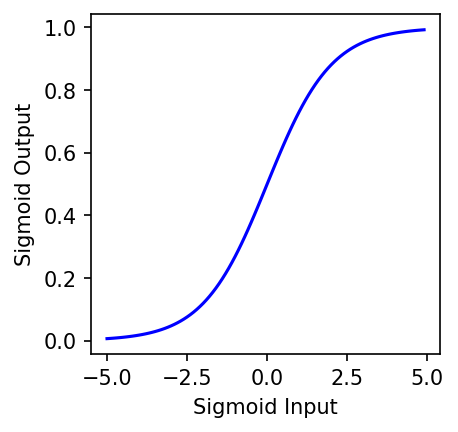

In [76]:
h = lambda z: 1. / (1 + np.exp(-z))
zs = np.arange(-5, 5, 0.1)
fig, ax = plt.subplots()
ax.plot(zs, h(zs), c = 'blue')
ax.set_ylabel('Sigmoid Output')
ax.set_xlabel('Sigmoid Input')
plt.show()

You can see the effect of the Sigmoid function is to "squash" the input values to between 0 and 1, and because of the steep slope in the middle, it will tend to output values towards 0 or 1 if the input is somewhat different than 0.

So we then come up with our rule by identifying:

$$z = \textbf{w}\cdot\textbf{x}.$$

Then $h(\textbf{w}\cdot\textbf{x}) \ge 0.5$ if $\textbf{w}\cdot\textbf{x} \ge 0\;$  and  $\;h(\textbf{w}\cdot\textbf{x}) \lt 0.5$ if $\textbf{w}\cdot\textbf{x} \lt 0$, and:

\begin{eqnarray*}
y = 1 \;\; &if&\; h(\textbf{w}\cdot\textbf{x}) \ge 0.5\\
y = 0 \;\; &if&\; h(\textbf{w}\cdot\textbf{x}) \lt 0.5.
\end{eqnarray*}

We will show soon that this identification can be achieved by minimizing a loss in the ERM framework called the **log loss** :

$$ R_{\cal{D}}(\textbf{w}) = - \sum_{y_i \in \cal{D}} \left ( y_i \log(h(\textbf{w}\cdot\textbf{x})) + ( 1 - y_i) \log(1 - h(\textbf{w}\cdot\textbf{x})) \right )$$

We will also add a regularization term:

$$ R_{\cal{D}}(\textbf{w}) = - \sum_{y_i \in \cal{D}} \left ( y_i \log(h(\textbf{w}\cdot\textbf{x})) + ( 1 - y_i) \log(1 - h(\textbf{w}\cdot\textbf{x})) \right ) + \frac{1}{C} \textbf{w}\cdot\textbf{w},$$

where $C$ is the regularization strength (equivalent to $1/\alpha$ from the Ridge case), and smaller values of $C$ mean stronger regularization. As before, the regularization tries to prevent features from having terribly high weights, thus implementing a form of feature selection. 

How did we come up with this loss? We'll come back to that, but let us see how logistic regression works out. 


### The Probabalistic Interpretation

Remember we said earlier that if $h > 0.5$ we ought to identify the sample with $y=1$? One way of thinking about this is to identify $h({w}\cdot{x})$ with the probability that the sample is a '1'  $\;$($y=1$). Then we have the intuitive notion that lets identify a sample as 1 if we find that the probabilty of being a '1' is $\;\ge 0.5$.

So suppose we say then that the probability of $y=1$ for a given $\textbf{x}$ is given by $h(\textbf{w}\cdot\textbf{x})$?

Then, the conditional probabilities of $y=1$ or $y=0$ given a particular sample's features $\textbf{x}$ are:

\begin{eqnarray*}
P(y=1 | \textbf{x}) &=& h(\textbf{w}\cdot\textbf{x}) \\
P(y=0 | \textbf{x}) &=& 1 - h(\textbf{w}\cdot\textbf{x}).
\end{eqnarray*}

These two can be written together as

$$P(y|\textbf{x}, \textbf{w}) = h(\textbf{w}\cdot\textbf{x})^y \left(1 - h(\textbf{w}\cdot\textbf{x}) \right)^{(1-y)} $$

Then multiplying over the samples we get the probability of the training $y$ given $\textbf{w}$ and the $\textbf{x}$:

$$P(y|\textbf{x},\textbf{w}) = P(\{y_i\} | \{\textbf{x}_i\}, \textbf{w}) = \prod_{y_i \in \cal{D}} P(y_i|\textbf{x}_i, \textbf{w}) = \prod_{y_i \in \cal{D}} h(\textbf{w}\cdot\textbf{x}_i)^{y_i} \left(1 - h(\textbf{w}\cdot\textbf{x}_i) \right)^{(1-y_i)}$$

Why use probabilities? Earlier, we talked about how the regression function $f(x)$ never gives us the $y$ exactly, because of noise. This hold for classification too. Even with identical features, a different sample may be classified differently. In strict matthematical terminology, the above function is known as the **likelihood function** (often simply called the **likelihood**) which describes the joint probability of the observed data, $\{y_i\}$'s, as a function of the parameters of the probability distribution of $y$. Please see this Wikipedia [article](https://en.wikipedia.org/wiki/Likelihood_function) for further details.

We said that another way to think about a noisy $y$ is to imagine that our data $\mathcal{D}$ was generated from  a joint probability distribution $P(x,y)$. Thus we need to model $y$ at a given $x$, written as $P(y|x)$, and since $P(x)$ is also a probability distribution, we have:

$$P(x,y) = P(y | x) P(x)$$

and can obtain our joint probability $P(x, y)$.

Indeed its important to realize that a particular training set can be thought of as a draw from some "true" probability distribution. If, for example, the probability of classifying a test sample as a '0' was 0.1, and it turns out that the test sample was a '0', it does not mean that this model was necessarily wrong. After all, in roughly a 10th of the draws, this new sample would be classified as a '0'! But, of-course its more unlikely than its likely, and having good probabilities means that we'll be likely right most of the time, which is what we want to achieve in classification. And furthermore, we can quantify this accuracy.

Thus its desirable to have probabilistic, or at the very least, ranked models of classification where you can tell which sample is more likely to be classified as a '1'. There are business reasons for this too. Consider the example of customer "churn": you are a cell-phone company and want to know, based on some of my purchasing habit and characteristic "features" if I am a likely defector. If so, you'll offer me an incentive not to defect. In this scenario, you might want to know which customers are most likely to defect, or even more precisely, which are most likely to respond to incentives. Based on these probabilities, you could then spend a finite marketing budget wisely.

### Maximizing the Probability of the Training Set

Now if we maximize $P(y|\textbf{x},\textbf{w})$, we will maximize the chance that each point is classified correctly, which is what we want to do. While this is not exactly the same thing as maximizing the 1-0 training risk, it is a principled way of obtaining the highest probability classification. This process is called **maximum likelihood** estimation since we are maximising the **likelihood of the training data** $y$, 

$$\mathcal{L} = P(y|\textbf{x},\textbf{w}).$$ 

Maximum likelihood is one of the corenerstone methods in statistics, and is used to estimate the parameters of probability distribution of data. 

We can equivalently maximize 

$$\ell = \log{P(y|\textbf{x},\textbf{w})}$$ 

since the natural logarithm $\log$ is a monotonic function. This is known as maximizing the **log-likelihood**. Thus we can equivalently *minimize* a risk that is the negative of  $\log(P(y|\textbf{x},\textbf{w}))$:

$$R_{\cal{D}}(h(x)) = -\ell = -\log \mathcal{L} = -\log{P(y|\textbf{x},\textbf{w})}$$


Thus

\begin{eqnarray*}
R_{\cal{D}}(h(x)) &=& -\log\left(\prod_{y_i \in \cal{D}} h(\textbf{w}\cdot\textbf{x_i})^{y_i} \left(1 - h(\textbf{w}\cdot\textbf{x_i}) \right)^{(1-y_i)}\right)\\
                  &=& -\sum_{y_i \in \cal{D}} \log\left(h(\textbf{w}\cdot\textbf{x_i})^{y_i} \left(1 - h(\textbf{w}\cdot\textbf{x_i}) \right)^{(1-y_i)}\right)\\                  
                  &=& -\sum_{y_i \in \cal{D}} \log\,h(\textbf{w}\cdot\textbf{x_i})^{y_i} + \log\,\left(1 - h(\textbf{w}\cdot\textbf{x_i}) \right)^{(1-y_i)}\\
                  &=& - \sum_{y_i \in \cal{D}} \left ( y_i \log(h(\textbf{w}\cdot\textbf{x})) + ( 1 - y_i) \log(1 - h(\textbf{w}\cdot\textbf{x})) \right )
\end{eqnarray*}
                  
This is exactly the risk we had above, leaving out the regularization term (which we shall return to later) and was the reason we chose it over the 1-0 risk. 

Notice that this little process we carried out above tells us something very interesting: **Probabilistic estimation using maximum likelihood is equivalent to Empiricial Risk Minimization using the negative log-likelihood**, since all we did was to minimize the negative log-likelihood over the training samples.

`sklearn` will return the probabilities for our samples, or for that matter, for any input vector set $\{\textbf{x}_i\}$, i.e. $P(y_i | \textbf{x}_i, \textbf{w})$:

Let us plot the probabilities obtained from `predict_proba`, overlayed on the samples with their true labels:

In [77]:
best_esstimator_grid = grid.best_estimator_

In [78]:
best_esstimator_grid

LogisticRegression(C=10.0, max_iter=500, solver='newton-cg')

In [79]:
columns = pd.MultiIndex.from_tuples([('Test Case', 'no heart disease'),
                                     ('Test Case', 'heart disease')])
predict_proba_df = pd.DataFrame(data=best_esstimator_grid.predict_proba(Xtestlr),columns=columns)
predict_proba_df

Test Case              
   no heart disease heart disease
0          0.005283      0.994717
1          0.878103      0.121897
2          0.979023      0.020977
3          0.084234      0.915766
4          0.788221      0.211779
..              ...           ...
63         0.284241      0.715759
64         0.606878      0.393122
65         0.962698      0.037302
66         0.000347      0.999653
67         0.395999      0.604001

[68 rows x 2 columns]

To illustrate further, we return to our simplistic two-feature classifier we created earlier:

In [80]:
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(heart_df_dummies[['cholesterol_mg_dl','resting_BP_mm_Hg']],
                     heart_df_dummies['heart_disease'],
                     train_size = 0.80,
                     random_state = 42)
# classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
classifier = LogisticRegression(solver = 'newton-cg', max_iter = 500, penalty='none')
classifier.fit(Xtrain, ytrain)

LogisticRegression(max_iter=500, penalty='none', solver='newton-cg')

In this case, we will use the other function (`points_plot_prob()`) we defined, to label the points using the *predicted* values (earlier we labeled them with their actual values by using the function `points_plot()`) and label the probabilities output by the classifier. Note that earlier we set the argument `predicted = False` when using `points_plot()` function. In the next code block, we will use `points_plot_prob()` that sets `predicted = True` when calling `points_plot()` function. This essentially labels the points using the *predicted* values.

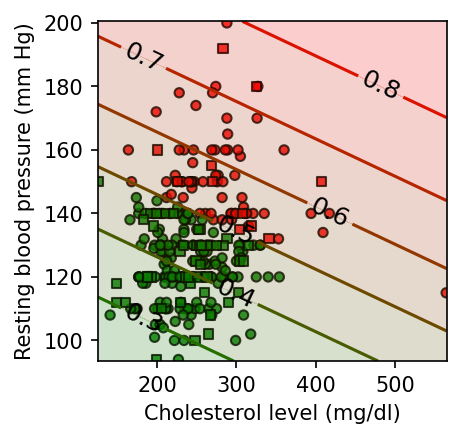

In [81]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
_ = points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, classifier)

Notice that lines of equal probability, as might be expected are stright lines. What the classifier does is very intuitive: if the probability is greater than 0.5, it classifies the sample as type '1' (has heart disease), otherwise it classifies the sample to be class '0' (no heart disease). Thus in the diagram above, where we have plotted the predicted values rather than actual labels of samples, the test data points (and the training data points) whose probability are greater than 0.5 are clearly been colored red while the test data points (and the training data points) whose probability are less than 0.5 are colored green. This produces a clear demarcation between the data points with prediction type '1' (heart disease) vs those of prediction type '0' (no heart disease) at the 0.5 probability line. Earlier when we plotted the *actual* labels (not the predicted labels), then such a nice separation was not observed because the classifier with only two input features (namely, `cholesterol_mg_dl` and `resting_BP_mm_Hg`) was not very good. Recall that the accuracy on the training data and testing data were, respectively, only 61% and 59%.

Again, this notion of trying to obtain the line or boundary of demarcation is what is called a **discriminative** classifier. The algorithm tries to find a decision boundary that separates those who have heart disease from those who do not. To classify a new sample, it checks on which side of the decision boundary the sample falls, and makes a prediction. In other words we are asking, given $\textbf{x}$, what is the probability of a given $y$, or, what is the likelihood $P(y|\textbf{x},\textbf{w})$?

### Discriminative vs Generative Classifiers

Logistic regression is what is known as a **discriminative classifier** as we learn a soft boundary between/among classes. Another paradigm is the **generative classifier** where we learn the distribution of each class. For more examples of generative classifiers, look [here](https://en.wikipedia.org/wiki/Generative_model). 

## Additional and Related Reference
  
- [Lab 5 in the CS109 course](https://github.com/cs109/2015lab5)

## Acknowledgement

- [Blaine Bateman](https://www.linkedin.com/in/blainebateman/)--Data Scientist
  
- [AJ Sanchez](https://www.linkedin.com/in/aj-sanchez/)--Data Scientist